<div dir="rtl">
    
# 03. الشبكات العصبية التلافيفية ورؤية الكمبيوتر باستخدام TensorFlow

##### لقد قمنا حتى الآن بتغطية أساسيات TensorFlow وقمنا ببناء مجموعة من النماذج للتعامل مع المشكلات المختلفة.

##### سنتحدث الآن بشكل محدد ونرى كيف يمكن استخدام نوع خاص من الشبكات العصبية، [الشبكات العصبية التلافيفية (CNNs)](https://en.wikipedia.org/wiki/Convolutional_neural_network) لرؤية الكمبيوتر (اكتشاف الأنماط). في البيانات المرئية).

##### > 🔑 **ملاحظة:** في التعلم العميق، يمكن استخدام أنواع مختلفة من بنيات النماذج لحل مشكلات مختلفة. على سبيل المثال، يمكنك استخدام شبكة عصبية تلافيفية لإجراء تنبؤات بشأن بيانات الصورة و/أو البيانات النصية. ومع ذلك، في الممارسة العملية، تعمل بعض البنى عادةً بشكل أفضل من غيرها.

##### على سبيل المثال، قد ترغب في:
* تصنيف ما إذا كانت صورة الطعام تحتوي على بيتزا 🍕 أو شريحة لحم 🥩 (سنقوم بذلك)
* اكتشاف ما إذا كان هناك كائن يظهر في الصورة أم لا (على سبيل المثال، هل مرت سيارة معينة عبر كاميرا أمنية؟)

##### في هذا الدفتر، سنتبع سير عمل نمذجة TensorFlow الذي نتبعه حتى الآن بينما نتعلم كيفية إنشاء شبكات CNN واستخدامها.

## ما سنغطيه

##### على وجه التحديد، سنقوم بالمتابعة مع TensorFlow:

- الحصول على مجموعة بيانات للعمل معها
- معمارية الشبكة العصبية التلافيفية
- مثال سريع وشامل (ما نعمل على تحقيقه)
- خطوات نمذجة تصنيف الصور الثنائية باستخدام شبكات CNN
  - تصبح واحدة مع البيانات
  - إعداد البيانات للنمذجة
  - إنشاء نموذج CNN (بدءًا بخط الأساس)
  - تركيب نموذج (الحصول على أنماط في بياناتنا)
  - تقييم النموذج
  - تحسين النموذج
  - التنبؤ بنموذج مدرب
- خطوات نمذجة تصنيف الصور متعدد الفئات باستخدام شبكات CNN
 - نفس ما ورد أعلاه (ولكن هذه المرة مع مجموعة بيانات مختلفة)

## كيف يمكنك استخدام هذا الدفتر

##### يمكنك قراءة الأوصاف والتعليمات البرمجية (يجب تشغيلها كلها، باستثناء الخلايا التي تخطئ عن قصد)، ولكن هناك خيار أفضل.

##### اكتب كل الكود بنفسك.

##### نعم. أنا جادة. قم بإنشاء دفتر ملاحظات جديد، وأعد كتابة كل سطر بنفسك. تحقق منه، وانظر إذا كان بإمكانك كسره، فلماذا ينكسر؟

##### لا يتعين عليك كتابة أوصاف النص ولكن كتابة الكود بنفسك تعد طريقة رائعة للحصول على خبرة عملية.

##### لا تقلق إذا ارتكبت أخطاء، فكلنا نفعل ذلك. الطريقة للتحسن وارتكاب أخطاء أقل هي **كتابة المزيد من التعليمات البرمجية**.

<div dir="rtl">

## احصل على البيانات

##### نظرًا لأن الشبكات العصبية التلافيفية تعمل بشكل جيد مع الصور، لمعرفة المزيد عنها، سنبدأ بمجموعة بيانات من الصور.

##### الصور التي سنعمل معها مأخوذة من [مجموعة بيانات Food-101](https://data.vision.ee.ethz.ch/cvl/datasets_extra/food-101/)، وهي مجموعة مكونة من 101 فئة مختلفة من 101.000 (1000 صورة لكل فئة) صورة حقيقية لأطباق الطعام.

##### للبدء، سنستخدم فقط فئتين من الفئات، البيتزا 🍕 وشرائح اللحم 🥩 وإنشاء مصنف ثنائي.

##### > 🔑 **ملاحظة:** لإعداد البيانات التي نستخدمها، تم تنفيذ خطوات المعالجة المسبقة، مثل نقل الصور إلى مجلدات مجموعة فرعية مختلفة.
##### سنقوم بتنزيل ملف .zip للمجموعة الفرعية "pizza_steak" ونقوم بفك ضغطه.

<div dir="rtl">

##### تحميل ملف مضغوط

In [1]:
# Download zip file of pizza_steak images
!wget -O "pizza_steak.zip" https://kaust-my.sharepoint.com/:u:/g/personal/halimia_kaust_edu_sa/EV-U8BpeYqRFiJnfpmFAoWgB8c54tnQggMjDNLP0BZJ0nA?download=1

--2021-12-06 05:16:49--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.214.128, 172.253.114.128, 108.177.111.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.214.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M   196MB/s    in 0.5s    

2021-12-06 05:16:50 (196 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



<div dir="rtl">

##### قم بفك ضغط الملف الذي تم تنزيله

In [ ]:
import zipfile

# Unzip the downloaded file
zip_ref = zipfile.ZipFile("pizza_steak.zip", "r")
zip_ref.extractall()
zip_ref.close()

<div dir="rtl">

> 🔑 **ملاحظة:** إذا كنت تستخدم Google Colab وانقطع الاتصال بوقت التشغيل، فقد يتعين عليك إعادة تنزيل الملفات. يمكنك القيام بذلك عن طريق إعادة تشغيل الخلية أعلاه.

<div dir="rtl">

## فحص البيانات (انضم إليها)

##### من الخطوات الحاسمة للغاية في بداية أي مشروع للتعلم الآلي أن تصبح جزءًا من البيانات. وهذا يعني عادةً الكثير من التصورات وفحص المجلدات لفهم البيانات التي تعمل بها.

##### مع ما يقال، دعونا نتفحص البيانات التي قمنا بتنزيلها للتو.

##### لقد تم تنسيق بنية الملف ليكون بتنسيق نموذجي قد تستخدمه في التعامل مع الصور.

##### اكثر تحديدا:
* دليل "القطار" الذي يحتوي على جميع الصور الموجودة في مجموعة بيانات التدريب مع أدلة فرعية تم تسمية كل منها على اسم فئة معينة تحتوي على صور لتلك الفئة.
* دليل "اختبار" بنفس بنية دليل "القطار".

```
مثال على بنية الملف

Pizza_steak <- مجلد المستوى الأعلى
└───تدريب <- صور التدريب
│ └───بيتزا
│ │ │ 1008104.jpg
│ │ │ 1638227.jpg
│ │ │ ...
│ └───شريحة لحم
│ │ 1000205.jpg
│ │ 1647351.jpg
│ │ ...
│
└───اختبار <- اختبار الصور
│ └───بيتزا
│ │ │ 1001116.jpg
│ │ │ 1507019.jpg
│ │ │ ...
│ └───شريحة لحم
│ │ 100274.jpg
│ │ 1653815.jpg
│ │ ...
 ```

##### دعونا نتفحص كل الأدلة التي قمنا بتنزيلها.

##### للقيام بذلك، يمكننا استخدام الأمر ls الذي يرمز إلى القائمة.

In [3]:
import tensorflow as tf
# Define GPU settings
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try:
        # Create a TensorFlow session that uses both GPUs
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
        logical_gpus = tf.config.experimental.list_logical_devices('GPU')
        print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
    except RuntimeError as e:
        # Visualization is computationally expensive and can't run alongside model training.
        print(e)

3 Physical GPUs, 3 Logical GPUs


In [4]:
!ls pizza_steak

test  train


<div dir="rtl">

##### يمكننا أن نرى أن لدينا مجلد "التدريب" و"الاختبار".

##### دعونا نرى ما هو داخل واحد منهم.

In [5]:
!ls pizza_steak/train/

pizza  steak


<div dir="rtl">

##### وماذا عن داخل دليل "البخار"؟

In [6]:
!ls pizza_steak/train/steak/

1000205.jpg  1647351.jpg  2238681.jpg  2824680.jpg  3375959.jpg  417368.jpg
100135.jpg   1650002.jpg  2238802.jpg  2825100.jpg  3381560.jpg  4176.jpg
101312.jpg   165639.jpg   2254705.jpg  2826987.jpg  3382936.jpg  42125.jpg
1021458.jpg  1658186.jpg  225990.jpg   2832499.jpg  3386119.jpg  421476.jpg
1032846.jpg  1658443.jpg  2260231.jpg  2832960.jpg  3388717.jpg  421561.jpg
10380.jpg    165964.jpg   2268692.jpg  285045.jpg   3389138.jpg  438871.jpg
1049459.jpg  167069.jpg   2271133.jpg  285147.jpg   3393547.jpg  43924.jpg
1053665.jpg  1675632.jpg  227576.jpg   2855315.jpg  3393688.jpg  440188.jpg
1068516.jpg  1678108.jpg  2283057.jpg  2856066.jpg  3396589.jpg  442757.jpg
1068975.jpg  168006.jpg   2286639.jpg  2859933.jpg  339891.jpg	 443210.jpg
1081258.jpg  1682496.jpg  2287136.jpg  286219.jpg   3417789.jpg  444064.jpg
1090122.jpg  1684438.jpg  2291292.jpg  2862562.jpg  3425047.jpg  444709.jpg
1093966.jpg  168775.jpg   229323.jpg   2865730.jpg  3434983.jpg  447557.jpg
1098844.jpg  1697

<div dir="rtl">
    
##### واو، مجموعة كاملة من الصور. ولكن كم؟

##### > 🛠 **التدريب:** حاول إدراج نفس المعلومات الخاصة بدليل "البيتزا" في مجلد "الاختبار".

In [7]:
import os

# Walk through pizza_steak directory and list number of files
for dirpath, dirnames, filenames in os.walk("pizza_steak"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in 'pizza_steak'.
There are 2 directories and 0 images in 'pizza_steak/test'.
There are 0 directories and 250 images in 'pizza_steak/test/steak'.
There are 0 directories and 250 images in 'pizza_steak/test/pizza'.
There are 2 directories and 0 images in 'pizza_steak/train'.
There are 0 directories and 750 images in 'pizza_steak/train/pizza'.
There are 0 directories and 750 images in 'pizza_steak/train/steak'.


In [8]:
# Another way to find out how many images are in a file
num_steak_images_train = len(os.listdir("pizza_steak/train/steak"))

num_steak_images_train

750

In [9]:
# Get the class names (programmatically, this is much more helpful with a longer list of classes)
import pathlib
import numpy as np
data_dir = pathlib.Path("pizza_steak/train/") # turn our training path into a Python path
class_names = np.array(sorted([item.name for item in data_dir.glob('*')])) # created a list of class_names from the subdirectories
print(class_names)

['pizza' 'steak']


<div dir="rtl">

##### حسنًا، لدينا مجموعة مكونة من 750 صورة تدريبية و250 صورة اختبارية للبيتزا وشرائح اللحم.

##### دعونا ننظر إلى بعض.

##### > 🤔 **ملاحظة:** عندما تتعامل مع البيانات، من الجيد دائمًا تصورها قدر الإمكان. تعامل مع أول خطوتين من المشروع على أنهما جزء من البيانات. ** تصور، تصور، تصور. **

In [10]:
# View an image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  # Setup target directory (we'll view images from here)
  target_folder = target_dir+target_class

  # Get a random image path
  random_image = random.sample(os.listdir(target_folder), 1)

  # Read in the image and plot it using matplotlib
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off");

  print(f"Image shape: {img.shape}") # show the shape of the image

  return img

Image shape: (512, 512, 3)


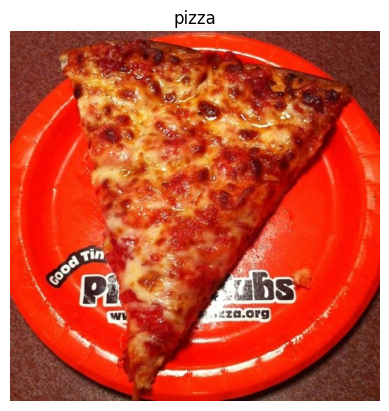

In [11]:
# View a random image from the training dataset
img = view_random_image(target_dir="pizza_steak/train/",
                        target_class="pizza")

<div dir="rtl">

##### بعد الاطلاع على ما يقرب من اثنتي عشرة صورة من فئات مختلفة، يمكنك البدء في الحصول على فكرة عما نعمل عليه.

##### تتكون مجموعة بيانات Food101 بأكملها من صور مماثلة من 101 فئة مختلفة.

##### ربما لاحظت أننا قمنا بطباعة شكل الصورة إلى جانب الصورة المرسومة.

##### وذلك لأن الطريقة التي يرى بها جهاز الكمبيوتر الخاص بنا الصورة تكون على شكل مصفوفة كبيرة (موتر).

In [12]:
# View the img (actually just a big array/tensor)
img

array([[[116,  48,  39],
        [138,  70,  61],
        [134,  66,  57],
        ...,
        [ 90,  27,  20],
        [ 95,  32,  25],
        [108,  45,  38]],

       [[114,  46,  37],
        [131,  63,  54],
        [129,  61,  52],
        ...,
        [ 91,  28,  21],
        [ 96,  33,  26],
        [106,  43,  36]],

       [[111,  43,  34],
        [123,  55,  46],
        [126,  58,  47],
        ...,
        [ 92,  29,  22],
        [ 94,  31,  24],
        [ 98,  35,  28]],

       ...,

       [[117,  64,  50],
        [122,  69,  55],
        [122,  66,  53],
        ...,
        [ 78,  30,  18],
        [ 84,  35,  21],
        [ 85,  36,  22]],

       [[107,  47,  37],
        [114,  54,  44],
        [120,  60,  50],
        ...,
        [ 80,  32,  20],
        [ 78,  29,  15],
        [ 81,  32,  18]],

       [[111,  48,  39],
        [108,  45,  36],
        [109,  46,  37],
        ...,
        [ 88,  40,  28],
        [ 83,  34,  20],
        [ 89,  40,  26]]

In [13]:
# View the image shape
img.shape # returns (width, height, colour channels)

(512, 512, 3)

<div dir="rtl">

##### عند النظر إلى شكل الصورة عن كثب، ستلاحظ أنها على شكل `(العرض، الارتفاع، قنوات الألوان)'.

##### في حالتنا، يختلف العرض والارتفاع، ولكن نظرًا لأننا نتعامل مع صور ملونة، فإن قيمة قنوات الألوان تكون دائمًا 3. وهذا لقيم مختلفة من [وحدات البكسل الحمراء والخضراء والزرقاء (RGB)](https://en .wikipedia.org/wiki/RGB_color_model).

##### ستلاحظ أن جميع القيم الموجودة في مصفوفة `img` تتراوح بين 0 و255. وذلك لأن هذا هو النطاق المحتمل لقيم الأحمر والأخضر والأزرق.

##### على سبيل المثال، البكسل ذو القيمة `أحمر=0، أخضر=0، أزرق=255` سيبدو أزرقًا جدًا.

##### لذا، عندما نبني نموذجًا للتمييز بين صور "البيتزا" و"شريحة اللحم"، فإننا سنجد أنماطًا في قيم البكسل المختلفة التي تحدد شكل كل فئة.

##### > 🔑 **ملاحظة:** كما ناقشنا من قبل، فإن العديد من نماذج التعلم الآلي، بما في ذلك الشبكات العصبية، تفضل أن تكون القيم التي تعمل بها بين 0 و1. ومع العلم بذلك، فإن إحدى خطوات المعالجة المسبقة الأكثر شيوعًا للعمل مع الصور هو **قياس** (يُشار إليه أيضًا باسم **تطبيع**) قيم البكسل الخاصة بها عن طريق قسمة صفائف الصور على 255.

In [14]:
# Get all the pixel values between 0 & 1
img/255. 

array([[[0.45490196, 0.18823529, 0.15294118],
        [0.54117647, 0.2745098 , 0.23921569],
        [0.5254902 , 0.25882353, 0.22352941],
        ...,
        [0.35294118, 0.10588235, 0.07843137],
        [0.37254902, 0.1254902 , 0.09803922],
        [0.42352941, 0.17647059, 0.14901961]],

       [[0.44705882, 0.18039216, 0.14509804],
        [0.51372549, 0.24705882, 0.21176471],
        [0.50588235, 0.23921569, 0.20392157],
        ...,
        [0.35686275, 0.10980392, 0.08235294],
        [0.37647059, 0.12941176, 0.10196078],
        [0.41568627, 0.16862745, 0.14117647]],

       [[0.43529412, 0.16862745, 0.13333333],
        [0.48235294, 0.21568627, 0.18039216],
        [0.49411765, 0.22745098, 0.18431373],
        ...,
        [0.36078431, 0.11372549, 0.08627451],
        [0.36862745, 0.12156863, 0.09411765],
        [0.38431373, 0.1372549 , 0.10980392]],

       ...,

       [[0.45882353, 0.25098039, 0.19607843],
        [0.47843137, 0.27058824, 0.21568627],
        [0.47843137, 0

<div dir="rtl">

## بنية (نموذجية) لشبكة عصبية تلافيفية

##### لا تختلف الشبكات العصبية التلافيفية عن الأنواع الأخرى من الشبكات العصبية للتعلم العميق في حقيقة أنه يمكن إنشاؤها بعدة طرق مختلفة. ما تراه أدناه هو بعض المكونات التي تتوقع العثور عليها في شبكة CNN التقليدية.

<div dir="rtl">

##### مكونات الشبكة العصبية التلافيفية:

| **المعلمة التشعبية/نوع الطبقة** | **ماذا يفعل؟** | **القيم النموذجية** |
| ----- | ----- | ----- |
| صورة (صور) الإدخال | استهدف الصور التي ترغب في اكتشاف الأنماط فيها| كل ما يمكنك التقاط صورة (أو فيديو) لـ |
| طبقة الإدخال | يأخذ الصور المستهدفة ويعالجها مسبقًا للحصول على طبقات إضافية | `input_shape = [حجم_الدفعة، ارتفاع_الصورة، عرض_الصورة، قنوات_اللون]` |
| طبقة الالتواء | يستخرج/يتعرف على أهم الميزات من الصور المستهدفة | متعددة، يمكن إنشاؤها باستخدام [`tf.keras.layers.ConvXD`](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Conv2D) (يمكن أن تكون X قيمًا متعددة) |
| تفعيل مخفي | إضافة عدم الخطية إلى الميزات التي تم تعلمها (الخطوط غير المستقيمة) | عادةً ReLU ([`tf.keras.activations.relu`](https://www.tensorflow.org/api_docs/python/tf/keras/activations/relu)) |
| طبقة التجميع | يقلل من أبعاد ميزات الصورة التي تم تعلمها | المتوسط ​​([`tf.keras.layers.AvgPool2D`](https://www.tensorflow.org/api_docs/python/tf/keras/layers/AveragePooling2D)) أو الحد الأقصى ([`tf.keras.layers.MaxPool2D`) ](https://www.tensorflow.org/api_docs/python/tf/keras/layers/MaxPool2D)) |
| طبقة متصلة بالكامل | يعمل على تحسين الميزات المستفادة من طبقات الالتفاف | [`tf.keras.layers.Dense`](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dense) |
| طبقة الإخراج | يأخذ الميزات المستفادة ويخرجها في شكل تسميات مستهدفة | `output_shape = [number_of_classes]` (على سبيل المثال، 3 للبيتزا أو شرائح اللحم أو السوشي)|
| تفعيل الإخراج | يضيف اللاخطية إلى طبقة الإخراج | [`tf.keras.activations.sigmoid`](https://www.tensorflow.org/api_docs/python/tf/keras/activations/sigmoid) (تصنيف ثنائي) أو [`tf.keras.activations.softmax`] (https://www.tensorflow.org/api_docs/python/tf/keras/activations/softmax) |

##### كيف يتراكمون معًا:

<img src="images/convn2.png" alt="سير عمل scikit-learn المكون من 6 خطوات" />

##### *مثال بسيط لكيفية تجميع الطبقات المذكورة أعلاه معًا في شبكة عصبية تلافيفية. لاحظ أنه يمكن في كثير من الأحيان ترتيب الطبقات التلافيفية والتجميعية وإعادة ترتيبها في العديد من التشكيلات المختلفة.*

<div dir="rtl">

## مثال شامل

##### لقد قمنا بمراجعة بياناتنا ووجدنا أن هناك 750 صورة تدريب، بالإضافة إلى 250 صورة اختبارية لكل فصل وكلها بأشكال مختلفة ومختلفة.

##### لقد حان الوقت للقفز مباشرة في النهاية العميقة.

عند قراءة [ورقة مؤلفي مجموعة البيانات الأصلية](https://data.vision.ee.ethz.ch/cvl/datasets_extra/food-101/static/bossard_eccv14_food-101.pdf)، نرى أنهم استخدموا [التعلم الآلي العشوائي للغابات model](https://medium.com/@williamkoehrsen/random-forest-simple-explanation-377895a60d2d) وبلغ متوسط ​​الدقة 50.76% في التنبؤ بالأطعمة المختلفة التي تحتوي عليها الصور المختلفة.

##### من الآن فصاعدًا، ستكون نسبة 50.76% هي خط الأساس لدينا.

##### > 🔑 **ملاحظة:** **خط الأساس** هو النتيجة أو مقياس التقييم الذي تريد تجربته والتغلب عليه. عادة ستبدأ بنموذج بسيط، ثم تنشئ خطًا أساسيًا وتحاول تجاوزه عن طريق زيادة تعقيد النموذج. إحدى الطرق الممتعة حقًا لتعلم التعلم الآلي هي العثور على نوع من أوراق النمذجة ذات النتائج المنشورة ومحاولة التغلب عليها.

##### يتكرر الكود الموجود في الخلية التالية بطريقة شاملة لتصميم مجموعة بيانات "pizza_steak" الخاصة بنا باستخدام شبكة عصبية تلافيفية (CNN) باستخدام المكونات المذكورة أعلاه.

##### ستكون هناك مجموعة من الأشياء التي قد لا تتعرف عليها، ولكن قم بالتنقل عبر الكود بنفسك ومعرفة ما إذا كان بإمكانك معرفة ما يفعله.

##### سنستعرض كل خطوة من الخطوات لاحقًا في دفتر الملاحظات.

##### كمرجع، النموذج الذي نستخدمه يكرر TinyVGG، وهي بنية رؤية الكمبيوتر التي تغذي [صفحة الويب التوضيحية لـ CNN](https://poloclub.github.io/cnn-explainer/).

##### > 📖 **المصدر:** البنية التي نستخدمها أدناه هي نسخة مصغرة من [VGG-16](https://arxiv.org/abs/1505.06798)، وهي شبكة عصبية تلافيفية جاءت في المرتبة الثانية في 2014 [مسابقة تصنيف ImageNet](http://image-net.org/).

<img src="images/tinyvgg.png" alt="سير عمل scikit-learn المكون من 6 خطوات" />

In [15]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Set the seed
tf.random.set_seed(42)

# Preprocess data (get all of the pixel values between 1 and 0, also called scaling/normalization)
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

# Setup the train and test directories
train_dir = "pizza_steak/train/"
test_dir = "pizza_steak/test/"

# Import data from directories and turn it into batches
train_data = train_datagen.flow_from_directory(train_dir,
                                               batch_size=32, # number of images to process at a time 
                                               target_size=(224, 224), # convert all images to be 224 x 224
                                               class_mode="binary", # type of problem we're working on
                                               seed=42)

valid_data = valid_datagen.flow_from_directory(test_dir,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode="binary",
                                               seed=42)

# Create a CNN model (same as Tiny VGG - https://poloclub.github.io/cnn-explainer/)
model_1 = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(filters=10, 
                         kernel_size=3, # can also be (3, 3)
                         activation="relu", 
                         input_shape=(224, 224, 3)), # first layer specifies input shape (height, width, colour channels)
  tf.keras.layers.Conv2D(10, 3, activation="relu"),
  tf.keras.layers.MaxPool2D(pool_size=2, # pool_size can also be (2, 2)
                            padding="valid"), # padding can also be 'same'
  tf.keras.layers.Conv2D(10, 3, activation="relu"),
  tf.keras.layers.Conv2D(10, 3, activation="relu"), # activation='relu' == tf.keras.layers.Activations(tf.nn.relu)
  tf.keras.layers.MaxPool2D(2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(1, activation="sigmoid") # binary activation output
])

# Compile the model
model_1.compile(loss="binary_crossentropy",
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

# Fit the model
history_1 = model_1.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/5


2024-03-17 14:21:54.051086: I tensorflow/stream_executor/cuda/cuda_dnn.cc:384] Loaded cuDNN version 8600
2024-03-17 14:21:56.517939: I tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2024-03-17 14:21:56.519021: I tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2024-03-17 14:21:56.519037: W tensorflow/stream_executor/gpu/asm_compiler.cc:80] Couldn't get ptxas version string: INTERNAL: Couldn't invoke ptxas --version
2024-03-17 14:21:56.520117: I tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2024-03-17 14:21:56.520164: W tensorflow/stream_executor/gpu/redzone_allocator.cc:314] INTERNAL: Failed to launch ptxas
Relying on driver to perform ptx compilation. 
Modify $PATH to customize ptxas location.
This message will be only logged once.
2024-03-17 14:21:57.925610: I tensorflow/stream_executor/cuda/c

47/47 [==============================] - 10s 89ms/step - loss: 0.6893 - accuracy: 0.5433 - val_loss: 0.6459 - val_accuracy: 0.6200
Epoch 2/5
47/47 [==============================] - 4s 81ms/step - loss: 0.5102 - accuracy: 0.7593 - val_loss: 0.3784 - val_accuracy: 0.8520
Epoch 3/5
47/47 [==============================] - 4s 83ms/step - loss: 0.4295 - accuracy: 0.8127 - val_loss: 0.4890 - val_accuracy: 0.7240
Epoch 4/5
47/47 [==============================] - 4s 84ms/step - loss: 0.3912 - accuracy: 0.8373 - val_loss: 0.3304 - val_accuracy: 0.8740
Epoch 5/5
47/47 [==============================] - 4s 90ms/step - loss: 0.3323 - accuracy: 0.8627 - val_loss: 0.3394 - val_accuracy: 0.8660


<div dir="rtl">

##### > 🤔 **ملاحظة:** إذا كان تشغيل الخلية أعلاه يستغرق أكثر من 12 ثانية تقريبًا لكل فترة، فمن المحتمل أنك لا تستخدم مسرّع GPU. إذا كنت تستخدم دفتر ملاحظات Colab، فيمكنك الوصول إلى مسرع GPU بالانتقال إلى Runtime -> Change Runtime Type -> Hardware Accelerator وتحديد "GPU". بعد القيام بذلك، قد تضطر إلى إعادة تشغيل جميع الخلايا المذكورة أعلاه لأن تغيير نوع وقت التشغيل يتسبب في إعادة تعيين Colab.

<div dir="rtl">
    
##### - جيد! بعد 5 فترات، تجاوز نموذجنا النتيجة الأساسية البالغة 50.76% من الدقة (حصل نموذجنا على دقة تصل إلى 85% في مجموعة التدريب ودقة تصل إلى 85% في مجموعة الاختبار).

##### ومع ذلك، فقد مر نموذجنا فقط بمشكلة التصنيف الثنائي بدلاً من جميع الفئات الـ 101 في مجموعة بيانات Food101، لذلك لا يمكننا مقارنة هذه المقاييس بشكل مباشر. ومع ذلك، تظهر النتائج حتى الآن أن نموذجنا يتعلم شيئًا ما.

##### > 🛠 **التدريب:** انتقل عبر كل مجموعة من الكتل البرمجية الرئيسية في الخلية أعلاه، ما رأيك في كل منها؟ لا بأس إذا لم تكن متأكدًا، فسنقوم بذلك قريبًا. في هذه الأثناء، اقضِ 10 دقائق في اللعب حول [موقع CNN التوضيحي] المذهل (https://poloclub.github.io/cnn-explainer/). ماذا تلاحظ بشأن أسماء الطبقات في أعلى صفحة الويب؟


##### وبما أننا قد قمنا بالفعل بملاءمة النموذج، فلنتحقق من بنيته.

In [16]:
# Check out the layers in our model
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 10)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 53, 53, 10)       0         
 2D)                                                    

<div dir="rtl">

##### الآن هناك بعض الأشياء الجديدة التي لم نناقشها هنا، وهي:
* فئة [`ImageDataGenerator`](https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator) والمعلمة `rescale`
* طريقة [`flow_from_directory()`](https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator#flow_from_directory)
  * المعلمة "حجم الدفعة".
  * المعلمة "target_size".
* طبقات [`Conv2D`](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Conv2D) (والمعلمات التي تأتي معها)
* طبقات [`MaxPool2D`](https://www.tensorflow.org/api_docs/python/tf/keras/layers/MaxPool2D) (ومعلماتها).
* معلمات `steps_per_epoch` و`validation_steps` في الدالة `fit()`

##### قبل أن نتعمق في كل منها، دعونا نرى ما سيحدث إذا حاولنا ملاءمة النموذج الذي عملنا معه سابقًا مع بياناتنا.

<div dir="rtl">

## استخدام نفس النموذج السابق

##### لتوضيح كيف يمكن للشبكات العصبية أن تتكيف مع العديد من المشاكل المختلفة، دعونا نرى كيف يمكن لنموذج التصنيف الثنائي الذي بنيناه سابقًا أن يعمل مع بياناتنا.

##### > 🔑 **ملاحظة:** إذا لم تكن قد اطلعت على دفتر التصنيف السابق، فلا توجد مشاكل، فسنقوم بإحضار بنية بسيطة مكونة من 4 طبقات تستخدم لفصل النقاط المنسوخة من [بيئة TensorFlow Playground](https://playground.tensorflow.org/#activation=tanh&batchSize=10&dataset=circle&regDataset=reg-plane&learningRate=0.03&regularizationRate=0&noise=0&networkShape=4,2&seed=0.42931&showTestData=false&discretize=false&percTrainData=50&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false)

##### يمكننا استخدام جميع المعلمات نفسها في نموذجنا السابق باستثناء تغيير شيئين:
* **البيانات** - نحن نعمل الآن على الصور بدلاً من النقاط.
* **شكل الإدخال** - علينا أن نخبر شبكتنا العصبية بشكل الصور التي نعمل معها.
  * من الممارسات الشائعة إعادة تشكيل الصور كلها بحجم واحد. في حالتنا، سنقوم بتغيير حجم الصور إلى `(224، 224، 3)`، أي ارتفاع وعرض 224 بكسل وعمق 3 لقنوات الألوان الأحمر والأخضر والأزرق.

In [17]:
# Set random seed
tf.random.set_seed(42)

# Create a model to replicate the TensorFlow Playground model
model_2 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(224, 224, 3)), # dense layers expect a 1-dimensional vector as input
  tf.keras.layers.Dense(4, activation='relu'),
  tf.keras.layers.Dense(4, activation='relu'),
  tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model_2.compile(loss='binary_crossentropy',
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

# Fit the model
history_2 = model_2.fit(train_data, # use same training data created above
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data, # use same validation data created above
                        validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 4s 84ms/step - loss: 0.7450 - accuracy: 0.4960 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 2/5
47/47 [==============================] - 4s 81ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 3/5
47/47 [==============================] - 4s 81ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 4/5
47/47 [==============================] - 4s 82ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 5/5
47/47 [==============================] - 4s 82ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000


<div dir="rtl">

##### حسنًا... تم تشغيل نموذجنا ولكن لا يبدو أنه تعلم أي شيء. تصل الدقة إلى 50% فقط في مجموعات التدريب والاختبار، وهو أمر جيد مثل التخمين في مشكلة التصنيف الثنائي.

##### دعونا نرى الهندسة المعمارية.

In [18]:
# Check out our second model's architecture
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 150528)            0         
                                                                 
 dense_1 (Dense)             (None, 4)                 602116    
                                                                 
 dense_2 (Dense)             (None, 4)                 20        
                                                                 
 dense_3 (Dense)             (None, 1)                 5         
                                                                 
Total params: 602,141
Trainable params: 602,141
Non-trainable params: 0
_________________________________________________________________


<div dir="rtl">

##### رائع. أحد أكثر الأشياء الملحوظة هنا هو العدد الأكبر بكثير من المعلمات في "model_2" مقابل "model_1".

##### يحتوي `model_2` على 602,141 معلمة قابلة للتدريب بينما يحتوي `model_1` على 31,101 فقط. وعلى الرغم من هذا الاختلاف، لا يزال أداء `model_1` بعيدًا جدًا عن أداء `model_2`.

##### > 🔑 **ملاحظة:** يمكنك التفكير في المعلمات القابلة للتدريب على أنها *أنماط يمكن للنموذج أن يتعلمها من البيانات*. حدسيًا، قد تعتقد أن المزيد هو الأفضل. وفي بعض الحالات يكون كذلك. لكن في هذه الحالة، يكمن الاختلاف هنا في النمطين المختلفين للنموذج الذي نستخدمه. حيث تحتوي سلسلة من الطبقات الكثيفة على عدد من المعلمات المختلفة القابلة للتعلم والمتصلة ببعضها البعض وبالتالي عدد أكبر من الأنماط الممكنة القابلة للتعلم، **تسعى الشبكة العصبية التلافيفية إلى فرز الأنماط الأكثر أهمية في الصورة وتعلمها**. لذلك، على الرغم من وجود معلمات أقل قابلية للتعلم في شبكتنا العصبية التلافيفية، إلا أنها غالبًا ما تكون أكثر فائدة في فك الرموز بين **الميزات** المختلفة في الصورة.

##### بما أن نموذجنا السابق لم ينجح، هل لديك أي أفكار حول كيفية إنجاحه؟

##### ماذا عن زيادة عدد الطبقات؟

##### وربما يزيد عدد الخلايا العصبية في كل طبقة؟

##### وبشكل أكثر تحديدًا، سنستخدم نموذج المعاينة المتقدم (زيادة عدد الخلايا العصبية (وتسمى أيضًا الوحدات المخفية) في كل طبقة كثيفة وإضافة طبقات إضافية.)

##### > 🔑 **ملاحظة:** غالبًا ما يُشار إلى إضافة طبقات إضافية أو زيادة عدد الخلايا العصبية في كل طبقة على أنها زيادة **تعقيد** نموذجك.

In [19]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, BatchNormalization
from keras.optimizers import Adam
from keras.callbacks import ReduceLROnPlateau, EarlyStopping
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

tf.random.set_seed(42)
random.seed(42)
np.random.seed(42)

# # Build the model
model_3 = Sequential([
    Flatten(input_shape=(224, 224, 3)),  # dense layers expect a 1-dimensional vector as input
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(256, activation='relu'),
    Dropout(0.2),
    Dense(512, activation='relu'),
    Dropout(0.2),
    Dense(256, activation='relu'),
    Dropout(0.2),
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='sigmoid')  # 1 output neurons for 2 classes, with sigmoid activation
])


# # Create a model similar to model_1 but add an extra layer and increase the number of hidden units in each layer
# model_3 = tf.keras.Sequential([
#   tf.keras.layers.Flatten(input_shape=(224, 224, 3)), # dense layers expect a 1-dimensional vector as input
#   tf.keras.layers.Dense(100, activation='relu'), # increase number of neurons from 4 to 100 (for each layer)
#   tf.keras.layers.Dense(100, activation='relu'),
#   tf.keras.layers.Dense(100, activation='relu'), # add an extra layer
#   tf.keras.layers.Dense(1, activation='sigmoid')
# ])

# Compile the model
model_3.compile(loss='binary_crossentropy',
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

# Fit the model
history_3 = model_3.fit(train_data, # use same training data created above
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data, # use same validation data created above
                        validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 5s 86ms/step - loss: 2.7349 - accuracy: 0.5413 - val_loss: 0.5191 - val_accuracy: 0.7440
Epoch 2/5
47/47 [==============================] - 4s 80ms/step - loss: 0.6319 - accuracy: 0.6873 - val_loss: 0.6472 - val_accuracy: 0.6460
Epoch 3/5
47/47 [==============================] - 4s 83ms/step - loss: 0.6768 - accuracy: 0.5793 - val_loss: 0.6619 - val_accuracy: 0.6300
Epoch 4/5
47/47 [==============================] - 4s 82ms/step - loss: 0.6297 - accuracy: 0.6840 - val_loss: 0.5623 - val_accuracy: 0.7500
Epoch 5/5
47/47 [==============================] - 4s 81ms/step - loss: 0.6096 - accuracy: 0.6860 - val_loss: 0.5565 - val_accuracy: 0.7100


<div dir="rtl">

#####  واو! يبدو أن نموذجنا يتعلم مرة أخرى. حصلت على دقة تصل إلى 70% في مجموعة التدريب ودقة تصل إلى 70% في مجموعة التحقق.

##### كيف تبدو المعماري؟

In [20]:
# Check out model_3 architecture
model_3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 150528)            0         
                                                                 
 dense_4 (Dense)             (None, 128)               19267712  
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_5 (Dense)             (None, 256)               33024     
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_6 (Dense)             (None, 512)               131584    
                                                                 
 dropout_2 (Dropout)         (None, 512)              

<div dir="rtl">

##### لقد زاد عدد المعلمات القابلة للتدريب أكثر من `model_2`. وحتى مع ما يقرب من (~ 20,000,000 مقابل ~ 31,000) من المعلمات القابلة للتدريب، فإن `model_3` ما زال لا يتفوق على `model_1`.

##### يوضح هذا قوة الشبكات العصبية التلافيفية وقدرتها على تعلم الأنماط على الرغم من استخدام معلمات أقل.

<div dir="rtl">

## التصنيف الثنائي: دعونا نقسمه

##### لقد مررنا للتو بزوبعة من الخطوات:

1. كن واحدًا مع البيانات (تصور، تصور، تصور...)
2. المعالجة المسبقة للبيانات (إعدادها لنموذج)
3. إنشاء نموذج (ابدأ بخط الأساس)
4. تناسب النموذج
5. تقييم النموذج
6. ضبط المعلمات المختلفة وتحسين النموذج (حاول التغلب على خط الأساس الخاص بك)
7. كرر ذلك حتى تشعر بالرضا

##### دعونا خطوة من خلال كل.

<div dir="rtl">

### 1. قم باستيراد البيانات والانضمام إليها

##### أيًا كان نوع البيانات التي تتعامل معها، فمن الجيد تصور ما لا يقل عن 10 إلى 100 عينة للبدء في بناء النموذج الذهني الخاص بك للبيانات.

##### في حالتنا، قد نلاحظ أن صور شرائح اللحم تميل إلى أن تكون ذات ألوان داكنة بينما تميل صور البيتزا إلى أن يكون لها شكل دائري مميز في المنتصف. قد تكون هذه هي الأنماط التي تلتقطها شبكتنا العصبية.

##### ستلاحظ أيضًا ما إذا كانت بعض بياناتك معطوبة (على سبيل المثال، تحمل تصنيفًا خاطئًا) وتبدأ في التفكير في الطرق التي يمكنك اتباعها لإصلاحها.

##### إذا لم تعمل خلية التصور أدناه، فتأكد من حصولك على البيانات عن طريق إلغاء التعليق على الخلية أدناه.

In [21]:
# import zipfile

# # Download zip file of pizza_steak images
# !wget -O "pizza_steak.zip" https://kaust-my.sharepoint.com/:u:/g/personal/halimia_kaust_edu_sa/EV-U8BpeYqRFiJnfpmFAoWgB8c54tnQggMjDNLP0BZJ0nA?download=1

# # Unzip the downloaded file
# zip_ref = zipfile.ZipFile("pizza_steak.zip", "r")
# zip_ref.extractall()
# zip_ref.close()

Image shape: (384, 512, 3)
Image shape: (512, 512, 3)


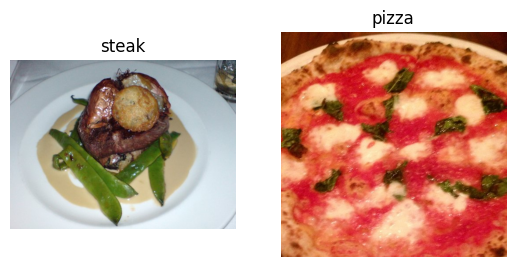

In [22]:
# Visualize data (requires function 'view_random_image' above)
plt.figure()
plt.subplot(1, 2, 1)
steak_img = view_random_image("pizza_steak/train/", "steak")
plt.subplot(1, 2, 2)
pizza_img = view_random_image("pizza_steak/train/", "pizza")

<div dir="rtl">

### 2. المعالجة المسبقة للبيانات (تحضيرها لنموذج)

##### إحدى أهم خطوات مشروع التعلم الآلي هي إنشاء مجموعة تدريب واختبار.

##### في حالتنا، تم تقسيم بياناتنا بالفعل إلى مجموعات تدريب واختبار. قد يكون هناك خيار آخر هنا وهو إنشاء مجموعة التحقق من الصحة أيضًا، ولكننا سنترك ذلك الآن.

##### بالنسبة لمشروع تصنيف الصور، من المعتاد أن يتم فصل بياناتك إلى دليلي "التدريب" و"الاختبار" مع وجود مجلدات فرعية في كل فئة. 

##### للبدء، نحدد مسارات دليل التدريب والاختبار.

In [23]:
# Define training and test directory paths
train_dir = "pizza_steak/train/"
test_dir = "pizza_steak/test/"

<div dir="rtl">

##### خطوتنا التالية هي تحويل بياناتنا إلى **دفعات**.

##### **الدُفعة** هي مجموعة فرعية صغيرة من مجموعة البيانات التي ينظر إليها النموذج أثناء التدريب. على سبيل المثال، بدلاً من النظر إلى 10000 صورة في وقت واحد ومحاولة اكتشاف الأنماط، قد ينظر النموذج إلى 32 صورة فقط في المرة الواحدة.

##### يفعل ذلك لعدة أسباب:
* قد لا تتناسب ذاكرة المعالج (GPU) لديك مع 10000 صورة (أو أكثر).
* قد تؤدي محاولة تعلم الأنماط في 10000 صورة بنقرة واحدة إلى عدم قدرة النموذج على التعلم بشكل جيد.

##### لماذا 32؟

##### هناك العديد من أحجام الدُفعات المختلفة التي يمكنك استخدامها، ولكن أثبت الحجم 32 أنه فعال جدًا في العديد من حالات الاستخدام المختلفة وغالبًا ما يكون هو الإعداد الافتراضي للعديد من وظائف المعالجة المسبقة للبيانات.

##### لتحويل بياناتنا إلى دفعات، سنقوم أولاً بإنشاء مثيل لـ [`ImageDataGenerator`](https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator) لكل مجموعة من مجموعات البيانات لدينا .

In [24]:
# Create train and test data generators and rescale the data 
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

<div dir="rtl">
    
##### تساعدنا فئة `ImageDataGenerator` في إعداد صورنا على دفعات بالإضافة إلى إجراء تحويلات عليها عند تحميلها في النموذج.

##### ربما لاحظت معلمة "إعادة القياس". وهذا أحد الأمثلة على التحولات التي نقوم بها.

##### هل تذكر من قبل كيف قمنا باستيراد صورة وكانت قيم البكسل الخاصة بها تتراوح بين 0 و255؟

##### تشبه المعلمة `rescale`، بالإضافة إلى `1/255'، قول "تقسيم جميع قيم البكسل على 255". يؤدي هذا إلى استيراد كافة الصور وتسوية قيم البكسل الخاصة بها (تحويلها إلى ما بين 0 و1).

##### > 🔑 **ملاحظة:** لمزيد من خيارات التحويل مثل زيادة البيانات (سنرى ذلك لاحقًا)، راجع [وثائق ImageDataGenerator`](https://www.tensorflow.org/api_docs/python/tf /keras/المعالجة المسبقة/image/ImageDataGenerator).

##### الآن لدينا اثنين من مثيلات ImageDataGenerator، يمكننا تحميل صورنا من الأدلة الخاصة بها باستخدام [`flow_from_directory`](https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ طريقة ImageDataGenerator#flow_from_directory).

In [25]:
# Turn it into batches
train_data = train_datagen.flow_from_directory(directory=train_dir,
                                               target_size=(224, 224),
                                               class_mode='binary',
                                               batch_size=32)

test_data = test_datagen.flow_from_directory(directory=test_dir,
                                             target_size=(224, 224),
                                             class_mode='binary',
                                             batch_size=32)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


<div dir="rtl">

##### رائع! يبدو أن مجموعة بيانات التدريب لدينا تحتوي على 1500 صورة تنتمي إلى فئتين (البيتزا وشرائح اللحم) وتحتوي مجموعة بيانات الاختبار لدينا على 500 صورة تنتمي أيضًا إلى فئتين.

##### بعض الأشياء إلى هنا:
* نظرًا لكيفية تنظيم أدلةنا، يتم استنتاج الفئات من خلال أسماء الأدلة الفرعية في "train_dir" و"test_dir".
* تحدد المعلمة `target_size` حجم الإدخال لصورنا بتنسيق `(الارتفاع والعرض)`.
* تحدد قيمة `class_mode` لـ ``ثنائي'' نوع مشكلة التصنيف لدينا. إذا كان لدينا أكثر من فئتين، فسنستخدم "الفئوية".
* يحدد حجم الدفعة عدد الصور التي ستكون في كل دفعة، وقد استخدمنا 32 وهي نفس الصورة الافتراضية.

##### يمكننا إلقاء نظرة على الصور والتسميات المجمعة لدينا من خلال فحص كائن "train_data".

In [26]:
# Get a sample of the training data batch 
images, labels = train_data.next() # get the 'next' batch of images/labels
len(images), len(labels)

(32, 32)

<div dir="rtl">

##### رائع، يبدو أن صورنا وملصقاتنا موجودة على دفعات مكونة من 32 قطعة.

##### دعونا نرى كيف تبدو الصور.

In [27]:
# Get the first two images
images[:2], images[0].shape

(array([[[[0.47058827, 0.40784317, 0.34509805],
          [0.48627454, 0.42352945, 0.36078432],
          [0.48627454, 0.43529415, 0.37254903],
          ...,
          [0.82745105, 0.7137255 , 0.48627454],
          [0.8431373 , 0.7372549 , 0.5294118 ],
          [0.87843144, 0.77647066, 0.58431375]],
 
         [[0.50980395, 0.427451  , 0.36078432],
          [0.5058824 , 0.42352945, 0.35686275],
          [0.5137255 , 0.4431373 , 0.3647059 ],
          ...,
          [0.82745105, 0.7058824 , 0.48235297],
          [0.82745105, 0.70980394, 0.49803925],
          [0.8431373 , 0.73333335, 0.5372549 ]],
 
         [[0.5254902 , 0.427451  , 0.34901962],
          [0.5372549 , 0.43921572, 0.36078432],
          [0.5372549 , 0.45098042, 0.36078432],
          ...,
          [0.82745105, 0.7019608 , 0.4784314 ],
          [0.82745105, 0.7058824 , 0.4901961 ],
          [0.8352942 , 0.7176471 , 0.5137255 ]],
 
         ...,
 
         [[0.77647066, 0.5647059 , 0.2901961 ],
          [0.77647

<div dir="rtl">

##### نظرًا لمعلمة `rescale` الخاصة بنا، أصبحت الصور الآن في شكل `(224، 224، 3)` بقيم تتراوح بين 0 و1.

##### ماذا عن التسميات؟

In [28]:
# View the first batch of labels
labels

array([1., 1., 0., 1., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0., 0., 1.,
       1., 0., 1., 0., 1., 1., 1., 0., 0., 0., 0., 0., 1., 0., 1.],
      dtype=float32)

<div dir="rtl">

##### نظرًا لأن المعلمة `class_mode` هي ``ثنائية`` فإن تصنيفاتنا تكون إما `0` (بيتزا) أو `1` (شريحة لحم).

##### الآن بعد أن أصبحت بياناتنا جاهزة، سيحاول نموذجنا اكتشاف الأنماط بين موترات الصورة والتسميات.

<div dir="rtl">

### 3. إنشاء نموذج (ابدأ بخط الأساس)

##### ربما تتساءل عما يجب أن تكون عليه بنية النموذج الافتراضية لديك.

##### والحقيقة هي أن هناك العديد من الإجابات المحتملة لهذا السؤال.

##### أحد الأساليب الإرشادية البسيطة لنماذج رؤية الكمبيوتر هو استخدام بنية النموذج التي تحقق أفضل أداء على [ImageNet](https://www.image-net.org/) (مجموعة كبيرة من الصور المتنوعة لقياس نماذج رؤية الكمبيوتر المختلفة).

##### ومع ذلك، في البداية، من الجيد بناء نموذج أصغر للحصول على النتيجة الأساسية التي تحاول تحسينها.

##### > 🔑 **ملاحظة:** في التعلم العميق، غالبًا ما يشير النموذج الأصغر إلى نموذج يحتوي على طبقات أقل من النموذج المتطور (SOTA). على سبيل المثال، قد يحتوي النموذج الأصغر على 3-4 طبقات بينما قد يحتوي النموذج الحديث، مثل ResNet50، على أكثر من 50 طبقة.

##### في حالتنا، لنأخذ نسخة أصغر من النموذج الذي يمكن العثور عليه على [موقع CNN التوضيحي](https://poloclub.github.io/cnn-explainer/) (`model_1` من الأعلى) ونبني نموذجًا 3 طبقة الشبكة العصبية التلافيفية.

In [29]:
# Make the creating of our model a little easier
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Activation
from tensorflow.keras import Sequential

In [30]:
# Create the model (this can be our baseline, a 3 layer Convolutional Neural Network)
model_4 = Sequential([
  Conv2D(filters=10, 
         kernel_size=3, 
         strides=1,
         padding='valid',
         activation='relu', 
         input_shape=(224, 224, 3)), # input layer (specify input shape)
  Conv2D(10, 3, activation='relu'),
  Conv2D(10, 3, activation='relu'),
  Flatten(),
  Dense(1, activation='sigmoid') # output layer (specify output shape)
])

<div dir="rtl">

##### عظيم! لدينا بنية شبكة عصبية تلافيفية بسيطة جاهزة للانطلاق.

##### ويتبع هيكل CNN النموذجي لما يلي:

```
الإدخال -> طبقات Conv + ReLU (غير الخطية) -> طبقة التجميع -> متصلة بالكامل (طبقة كثيفة) كمخرجات
```

##### دعونا نناقش بعض مكونات طبقة `Conv2D`:

* يعني ""2D"" أن مدخلاتنا ثنائية الأبعاد (الارتفاع والعرض)، على الرغم من أنها تحتوي على 3 قنوات ألوان، إلا أنه يتم تشغيل التلافيفات على كل قناة على حدة.
* "المرشحات" - هذا هو عدد "مستخرجات الميزات" التي سيتم نقلها فوق صورنا.
* `kernel_size` - حجم مرشحاتنا، على سبيل المثال، `kernel_size` `(3, 3)` (أو 3 فقط) يعني أن حجم كل مرشح سيكون 3x3، مما يعني أنه سينظر إلى مساحة 3x3 بكسل في كل مرة. كلما كانت النواة أصغر، كلما تم استخراج المزيد من الميزات الدقيقة.
* "الخطوة" - عدد وحدات البكسل التي سيتحرك عبرها "الفلتر" أثناء تغطيته للصورة. "الخطوة" 1 تعني أن الفلتر يتحرك عبر كل بكسل 1 × 1. "الخطوة" 2 تعني أنه يتحرك 2 بكسل في المرة الواحدة.
* `الحشوة` - يمكن أن يكون هذا إما ``نفسه`` أو ``صالح``، ويضيف ``نفسه`` أصفارًا إلى خارج الصورة بحيث يكون الناتج الناتج للطبقة التلافيفية هو نفس الإدخال، حيث نظرًا لأن ``صالح'' (افتراضي) يقطع وحدات البكسل الزائدة التي لا يتناسب معها `الفلتر` (على سبيل المثال، عرض 224 بكسل مقسومًا على حجم نواة 3 (224/3 = 74.6) يعني أنه سيتم قطع بكسل واحد من نهاية.

##### ما هي "الميزة"؟

##### **الميزة** يمكن اعتبارها أي جزء مهم من الصورة. على سبيل المثال، في حالتنا، قد تكون الميزة هي الشكل الدائري للبيتزا. أو الحواف الخشنة على السطح الخارجي لشريحة لحم.

##### من المهم ملاحظة أن هذه **الميزات** لم نحددها، وبدلاً من ذلك، يتعرف عليها النموذج أثناء تطبيق مرشحات مختلفة عبر الصورة.

##### > 📖 **الموارد:** للحصول على عرض توضيحي رائع لهذه الأمور أثناء العمل، تأكد من قضاء بعض الوقت في الاطلاع على ما يلي:
  * [صفحة ويب شرح CNN](https://poloclub.github.io/cnn-explainer/) - نظرة عامة مرئية رائعة على العديد من المفاهيم التي نكررها هنا باستخدام التعليمات البرمجية.
  * [دليل للحساب التلافيفي للتعلم العميق](https://arxiv.org/pdf/1603.07285.pdf) - مقدمة رائعة للرياضيات التي تجري خلف الكواليس للشبكة العصبية التلافيفية.
  * للحصول على شرح رائع للحشوة، راجع [إجابة Stack Overflow](https://stackoverflow.com/a/39371113/7900723).

##### الآن أصبح نموذجنا جاهزًا، فلنقم بتجميعه.

In [31]:
# Compile the model
model_4.compile(loss='binary_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])

<div dir="rtl">
    
##### نظرًا لأننا نعمل على حل مشكلة تصنيف ثنائي (البيتزا مقابل شريحة لحم)، فإن وظيفة "الخسارة" التي نستخدمها هي ""binary_crossentropy""، وإذا كانت متعددة الفئات، فقد نستخدم شيئًا مثل ""categorical_crossentropy"" .

##### آدم مع جميع الإعدادات الافتراضية هو مُحسِّننا ومقياس التقييم لدينا هو الدقة.

<div dir="rtl">

### 4. تناسب النموذج

##### لقد تم تجميع نموذجنا، وحان الوقت لملاءمته.

##### ستلاحظ معلمتين جديدتين هنا:
* `steps_per_epoch` - هذا هو عدد الدُفعات التي سيمر بها النموذج في كل فترة، وفي حالتنا، نريد أن يمر نموذجنا بجميع الدُفعات بحيث يكون مساويًا لطول `train_data` (1500 صورة في دفعات مكونة من 32 = 1500/32 = ~47 خطوة)
* `validation_steps` - كما هو مذكور أعلاه، باستثناء معلمة `validation_data` (500 صورة اختبارية على دفعات من 32 = 500/32 = ~16 خطوة)

In [32]:
# Check lengths of training and test data generators
len(train_data), len(test_data)

(47, 16)

In [33]:
# Fit the model
history_4 = model_4.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 4s 85ms/step - loss: 0.7984 - accuracy: 0.6933 - val_loss: 0.4025 - val_accuracy: 0.8260
Epoch 2/5
47/47 [==============================] - 4s 82ms/step - loss: 0.4059 - accuracy: 0.8227 - val_loss: 0.3848 - val_accuracy: 0.8540
Epoch 3/5
47/47 [==============================] - 4s 81ms/step - loss: 0.3150 - accuracy: 0.8827 - val_loss: 0.3630 - val_accuracy: 0.8380
Epoch 4/5
47/47 [==============================] - 4s 82ms/step - loss: 0.1489 - accuracy: 0.9553 - val_loss: 0.3920 - val_accuracy: 0.8260
Epoch 5/5
47/47 [==============================] - 4s 81ms/step - loss: 0.0463 - accuracy: 0.9913 - val_loss: 0.4491 - val_accuracy: 0.8380


<div dir="rtl">
    
### 5. تقييم النموذج

<div dir="rtl">
    
##### أوه نعم! يبدو أن نموذجنا يتعلم شيئًا ما.

##### دعونا نتحقق من منحنيات التدريب الخاصة به.

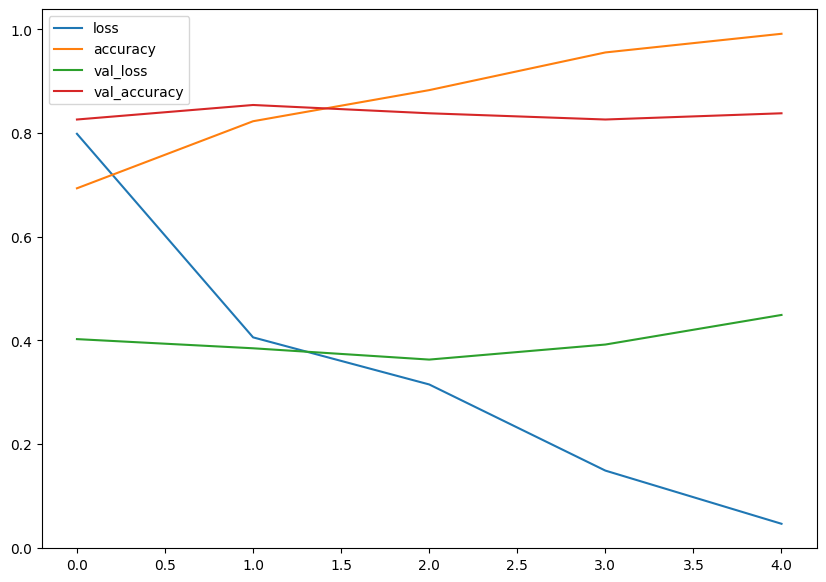

In [34]:
# Plot the training curves
import pandas as pd
pd.DataFrame(history_4.history).plot(figsize=(10, 7));

<div dir="rtl">

##### حسنًا، إذا حكمنا من خلال منحنيات الخسارة لدينا، يبدو أن نموذجنا ** يفرط في ** مجموعة بيانات التدريب.

##### > 🔑 **ملاحظة:** عندما يبدأ **فقدان التحقق من صحة النموذج** في التزايد**، فمن المحتمل أنه يفرط في ملاءمة مجموعة بيانات التدريب. وهذا يعني أنه يتعلم الأنماط الموجودة في مجموعة بيانات التدريب بشكل جيد للغاية، وبالتالي ستتضاءل قدرته على التعميم على البيانات غير المرئية.

##### لمزيد من فحص الأداء التدريبي لنموذجنا، دعونا نفصل منحنيات الدقة والخسارة.

In [35]:
# Plot the validation and training data separately
def plot_loss_curves(history):
  """
  Returns separate loss curves for training and validation metrics.
  """ 
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))

  # Plot loss
  plt.plot(epochs, loss, label='training_loss')
  plt.plot(epochs, val_loss, label='val_loss')
  plt.title('Loss')
  plt.xlabel('Epochs')
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label='training_accuracy')
  plt.plot(epochs, val_accuracy, label='val_accuracy')
  plt.title('Accuracy')
  plt.xlabel('Epochs')
  plt.legend();

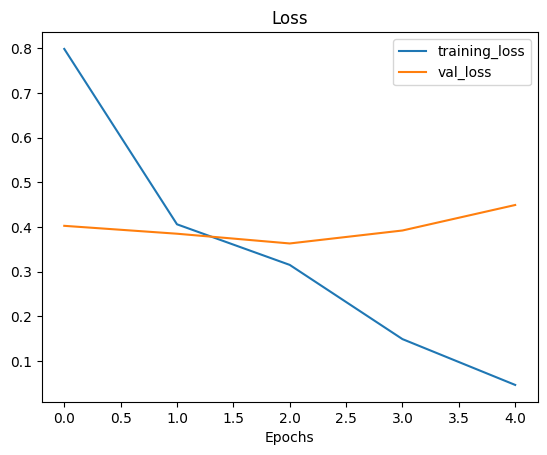

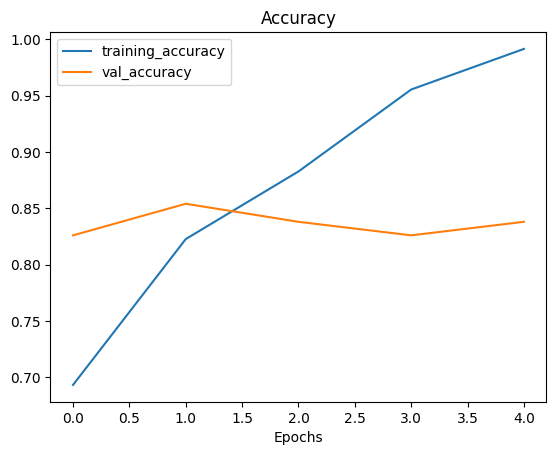

In [36]:
# Check out the loss curves of model_4
plot_loss_curves(history_4)

<div dir="rtl">

 الوضع المثالي لهذين المنحنيين هو أن يتبع كل منهما الآخر. إذا كان هناك أي شيء، يجب أن يكون منحنى التحقق أقل قليلاً من منحنى التدريب. إذا كانت هناك فجوة كبيرة بين منحنى التدريب ومنحنى التحقق، فهذا يعني أن نموذجك ربما يكون مفرط التجهيز.

In [37]:
# Check out our model's architecture
model_4.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 conv2d_5 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 conv2d_6 (Conv2D)           (None, 218, 218, 10)      910       
                                                                 
 flatten_3 (Flatten)         (None, 475240)            0         
                                                                 
 dense_10 (Dense)            (None, 1)                 475241    
                                                                 
Total params: 477,341
Trainable params: 477,341
Non-trainable params: 0
_________________________________________________________________


<div dir="rtl">

### 6. ضبط معلمات النموذج

##### يأتي تركيب نموذج التعلم الآلي في ثلاث خطوات:
0. إنشاء خط الأساس.
1. تغلب على خط الأساس عن طريق تركيب نموذج أكبر.
2. تقليل التجهيز الزائد.

#####  لقد مررنا حتى الآن بالخطوات 0 و 1.

##### وهناك بعض الأشياء الأخرى التي يمكننا تجربتها لزيادة ملاءمة نموذجنا:
* زيادة عدد الطبقات التلافيفية.
* زيادة عدد المرشحات التلافيفية.
* أضف طبقة كثيفة أخرى إلى مخرجات الطبقة المسطحة لدينا.

##### ولكن ما سنفعله بدلاً من ذلك هو التركيز على جعل منحنيات التدريب الخاصة بنموذجنا متوافقة بشكل أفضل مع بعضها البعض، وبعبارة أخرى، سننتقل إلى الخطوة 2.

##### لماذا يعد تقليل التجهيز أمرًا مهمًا؟ 

##### عندما يكون أداء النموذج جيدًا جدًا في بيانات التدريب وسيئًا في البيانات غير المرئية، فلن يكون ذلك مفيدًا لنا إذا أردنا استخدامه في العالم الحقيقي.

##### لنفترض أننا كنا نبني تطبيقًا لتصنيف أطعمة البيتزا مقابل شرائح اللحم، وكان أداء نموذجنا جيدًا للغاية فيما يتعلق ببيانات التدريب الخاصة بنا، ولكن عندما جربه المستخدمون، لم يحصلوا على نتائج جيدة جدًا في صور الطعام الخاصة بهم، فهل هذه تجربة جيدة؟

##### ليس حقيقيًا...

##### لذا بالنسبة للنماذج القليلة التالية التي سنبنيها، سنقوم بضبط عدد من المعلمات وفحص منحنيات التدريب على طول الطريق.

##### وهي أننا سنبني نموذجين آخرين:
* شبكة ConvNet مع [أقصى قدر من التجميع](https://deeplizard.com/learn/video/ZjM_XQa5s6s)
* شبكة ConvNet مع أقصى قدر من التجميع وزيادة البيانات

##### بالنسبة للنموذج الأول، سنتبع بنية CNN الأساسية المعدلة:

```
الإدخال -> طبقات التحويل + طبقات ReLU (غير الخطية) + الحد الأقصى لطبقات التجميع -> متصلة بالكامل (طبقة كثيفة) كإخراج
```

##### دعونا نبنيها. سيكون لها نفس بنية `model_4` ولكن مع طبقة [`MaxPool2D()`](https://www.tensorflow.org/api_docs/python/tf/keras/layers/MaxPool2D) بعد كل طبقة تلافيفية.

In [38]:
# Create the model (this can be our baseline, a 3 layer Convolutional Neural Network)
model_5 = Sequential([
  Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
  MaxPool2D(pool_size=2), # reduce number of features by half
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Flatten(),
  Dense(1, activation='sigmoid')
])

<div dir="rtl">

##### واو، لدينا نوع طبقة آخر لم نره من قبل.

##### إذا تعلمت الطبقات التلافيفية ميزات الصورة، فيمكنك التفكير في طبقة Max Pooling على أنها تكتشف *الأهم* من تلك الميزات. سنرى هذا مثالاً على ذلك بعد قليل.

In [39]:
# Compile model (same as model_4)
model_5.compile(loss='binary_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])

In [40]:
# Fit the model
history_5 = model_5.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 5s 87ms/step - loss: 0.6057 - accuracy: 0.6493 - val_loss: 0.4804 - val_accuracy: 0.7840
Epoch 2/5
47/47 [==============================] - 4s 83ms/step - loss: 0.4676 - accuracy: 0.7913 - val_loss: 0.3636 - val_accuracy: 0.8480
Epoch 3/5
47/47 [==============================] - 4s 81ms/step - loss: 0.4036 - accuracy: 0.8220 - val_loss: 0.3386 - val_accuracy: 0.8580
Epoch 4/5
47/47 [==============================] - 4s 81ms/step - loss: 0.3942 - accuracy: 0.8360 - val_loss: 0.3840 - val_accuracy: 0.8200
Epoch 5/5
47/47 [==============================] - 4s 78ms/step - loss: 0.3734 - accuracy: 0.8393 - val_loss: 0.3677 - val_accuracy: 0.8380


حسنًا، يبدو أن نموذجنا ذو الحد الأقصى للتجميع (`model_5`) يؤدي أداءً أسوأ في مجموعة التدريب ولكنه أفضل في مجموعة التحقق من الصحة.

قبل أن نتحقق من منحنيات التدريب الخاصة بها، دعونا نتحقق من بنيتها.

In [41]:
# Check out the model architecture
model_5.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 111, 111, 10)     0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 54, 54, 10)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 52, 52, 10)        910       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 26, 26, 10)      

<div dir="rtl">

##### هل لاحظت ما يحدث هنا مع شكل الإخراج في كل طبقة `MaxPooling2D`؟

##### يحصل على النصف في كل مرة. هذه هي فعليًا طبقة `MaxPooling2D` التي تأخذ مخرجات كل طبقة Conv2D وتقول "أريد فقط الميزات الأكثر أهمية، وتخلص من الباقي".

##### كلما كانت المعلمة "pool_size" أكبر، زاد ضغط الحد الأقصى لطبقة التجميع على الميزات خارج الصورة. ومع ذلك، إذا كانت كبيرة جدًا، فقد لا يتمكن النموذج من تعلم أي شيء.

##### تظهر نتائج هذا التجميع في انخفاض كبير في إجمالي المعلمات القابلة للتدريب (8,861 في `model_5` و477,431 في `model_4`).

##### حان الوقت للتحقق من منحنيات الخسارة.

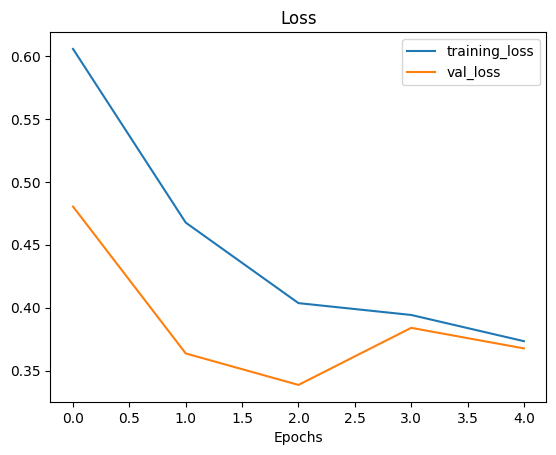

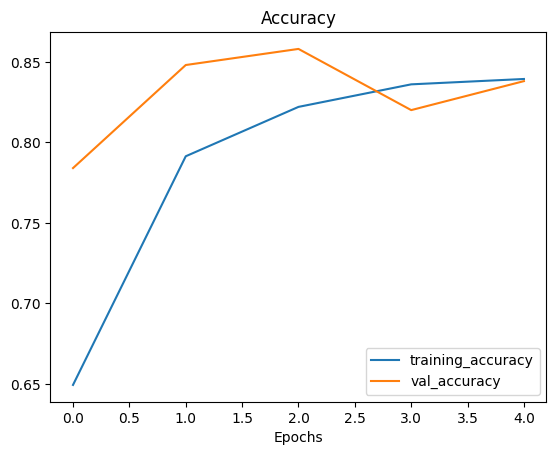

In [42]:
# Plot loss curves of model_5 results
plot_loss_curves(history_5)

<div dir="rtl">

#####  - جيد! يمكننا أن نرى منحنيات التدريب تقترب كثيرًا من بعضها البعض. ومع ذلك، يبدو أن فقدان التحقق من الصحة لدينا سيبدأ في الزيادة في النهاية، مما قد يؤدي بدوره إلى التجاوز.

##### حان الوقت للبحث في مجموعة الحيل لدينا وتجربة طريقة أخرى لمنع التجاوز، وهي زيادة البيانات.

##### أولاً، سنرى كيف يتم ذلك باستخدام الكود ثم سنناقش ما يفعله.

##### لتنفيذ زيادة البيانات، سيتعين علينا إعادة إنشاء مثيلات [`ImageDataGenerator`](https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator).

In [43]:
# Create ImageDataGenerator training instance with data augmentation
train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                             rotation_range=20, # rotate the image slightly between 0 and 20 degrees (note: this is an int not a float)
                                             shear_range=0.2, # shear the image
                                             zoom_range=0.2, # zoom into the image
                                             width_shift_range=0.2, # shift the image width ways
                                             height_shift_range=0.2, # shift the image height ways
                                             horizontal_flip=True) # flip the image on the horizontal axis

# Create ImageDataGenerator training instance without data augmentation
train_datagen = ImageDataGenerator(rescale=1/255.) 

# Create ImageDataGenerator test instance without data augmentation
test_datagen = ImageDataGenerator(rescale=1/255.)

<div dir="rtl">

##### > 🤔 **سؤال:** ما هي زيادة البيانات؟

##### **تعزيز البيانات** هي عملية تغيير بيانات التدريب لدينا، مما يؤدي إلى مزيد من التنوع وبالتالي السماح لنماذجنا بمعرفة المزيد من الأنماط القابلة للتعميم. قد يعني التغيير ضبط دوران الصورة، أو قلبها، أو قصها، أو أي شيء مشابه.

##### يؤدي القيام بذلك إلى محاكاة نوع البيانات التي يمكن استخدام النموذج عليها في العالم الحقيقي.

##### إذا كنا نبني تطبيقًا للبيتزا مقابل شرائح اللحم، فقد لا تكون جميع الصور التي يلتقطها المستخدمون لدينا في إعدادات مشابهة لبيانات التدريب الخاصة بنا. يمنحنا استخدام زيادة البيانات طريقة أخرى لمنع التجهيز الزائد وبالتالي جعل نموذجنا أكثر قابلية للتعميم.

##### > 🔑 **ملاحظة:** عادةً ما يتم إجراء زيادة البيانات على بيانات التدريب فقط. باستخدام معلمات زيادة البيانات المضمنة `ImageDataGenerator`، يتم ترك صورنا كما هي في الدلائل ولكن يتم معالجتها بشكل عشوائي عند تحميلها في النموذج.

In [44]:
# Import data and augment it from training directory
print("Augmented training images:")
train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                   target_size=(224, 224),
                                                                   batch_size=32,
                                                                   class_mode='binary',
                                                                   shuffle=False) # Don't shuffle for demonstration purposes, usually a good thing to shuffle

# Create non-augmented data batches
print("Non-augmented training images:")
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224, 224),
                                               batch_size=32,
                                               class_mode='binary',
                                               shuffle=False) # Don't shuffle for demonstration purposes

print("Unchanged test images:")
test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size=(224, 224),
                                             batch_size=32,
                                             class_mode='binary')

Augmented training images:
Found 1500 images belonging to 2 classes.
Non-augmented training images:
Found 1500 images belonging to 2 classes.
Unchanged test images:
Found 500 images belonging to 2 classes.


<div dir="rtl">
    
##### أفضل من الحديث عن زيادة البيانات، ماذا لو رأينا ذلك؟

##### (تذكر شعارنا؟ تصور، تصور، تصور...)

In [45]:
# Get data batch samples
images, labels = train_data.next()
augmented_images, augmented_labels = train_data_augmented.next() # Note: labels aren't augmented, they stay the same

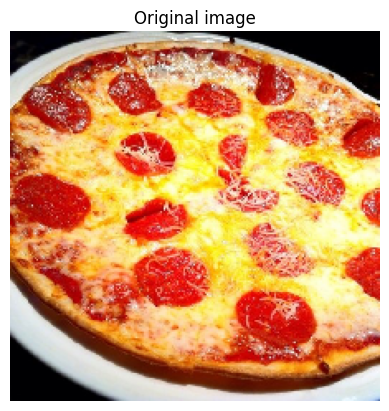

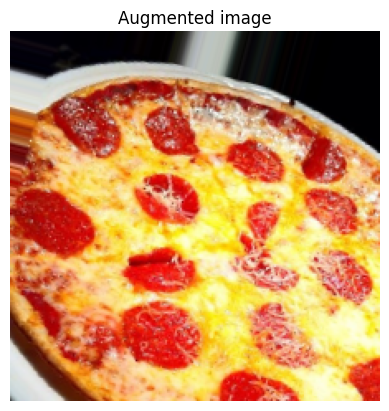

In [46]:
# Show original image and augmented image
random_number = random.randint(0, 32) # we're making batches of size 32, so we'll get a random instance
plt.imshow(images[random_number])
plt.title(f"Original image")
plt.axis(False)
plt.figure()
plt.imshow(augmented_images[random_number])
plt.title(f"Augmented image")
plt.axis(False);

<div dir="rtl">

##### بعد الاطلاع على عينة من الصور الأصلية والمعززة، يمكنك البدء في رؤية بعض أمثلة التحويلات على صور التدريب.

##### لاحظ كيف تبدو بعض الصور المعززة وكأنها نسخ مشوهة قليلاً من الصورة الأصلية. وهذا يعني أن نموذجنا سيضطر إلى تجربة وتعلم الأنماط في صور أقل من مثالية، وهو ما يحدث غالبًا عند استخدام صور العالم الحقيقي.

##### > 🤔 **السؤال:** هل يجب أن أستخدم تقنية تعزيز البيانات؟ وكم يجب أن أزيد؟

##### تعد زيادة البيانات طريقة لمحاولة منع فرط ملاءمة النموذج. إذا كان نموذجك يعاني من فرط المطابقة (على سبيل المثال، فقدان التحقق من الصحة يستمر في التزايد)، فقد ترغب في تجربة استخدام زيادة البيانات.

##### أما بالنسبة لمقدار زيادة البيانات، فلا توجد ممارسة محددة لذلك. من الأفضل التحقق من الخيارات الموجودة في فئة `ImageDataGenerator` والتفكير في كيفية استفادة النموذج في حالة الاستخدام الخاصة بك من بعض زيادة البيانات.

##### الآن لدينا بيانات معززة، فلنحاول إعادة تركيب نموذج عليها ونرى كيف تؤثر على التدريب.

##### سنستخدم نفس النموذج مثل `model_5`.

In [47]:
# Create the model (same as model_5)
model_6 = Sequential([
  Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
  MaxPool2D(pool_size=2), # reduce number of features by half
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Flatten(),
  Dense(1, activation='sigmoid')
])

# Compile the model
model_6.compile(loss='binary_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])

# Fit the model
history_6 = model_6.fit(train_data_augmented, # changed to augmented training data
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 14s 301ms/step - loss: 0.7484 - accuracy: 0.5280 - val_loss: 0.6819 - val_accuracy: 0.5920
Epoch 2/5
47/47 [==============================] - 14s 295ms/step - loss: 0.6990 - accuracy: 0.5413 - val_loss: 0.6684 - val_accuracy: 0.7680
Epoch 3/5
47/47 [==============================] - 14s 296ms/step - loss: 0.6878 - accuracy: 0.5733 - val_loss: 0.6623 - val_accuracy: 0.7820
Epoch 4/5
47/47 [==============================] - 14s 295ms/step - loss: 0.6713 - accuracy: 0.6553 - val_loss: 0.6134 - val_accuracy: 0.6720
Epoch 5/5
47/47 [==============================] - 14s 292ms/step - loss: 0.6219 - accuracy: 0.6787 - val_loss: 0.6088 - val_accuracy: 0.6320


<div dir="rtl">

##### > 🤔 **السؤال:** لماذا لم يحصل نموذجنا على نتائج جيدة جدًا في مجموعة التدريب في البداية؟

##### ذلك لأنه عندما أنشأنا "train_data_augmented"، قمنا بإيقاف تشغيل خلط البيانات باستخدام "shuffle=False"، مما يعني أن نموذجنا لا يرى سوى مجموعة من نوع واحد من الصور في المرة الواحدة.

##### على سبيل المثال، يتم تحميل فئة البيتزا أولاً لأنها الدرجة الأولى. وبالتالي يتم قياس أدائه على فئة واحدة فقط وليس على كلا الفئتين. يتحسن أداء بيانات التحقق من الصحة بشكل مطرد لأنها تحتوي على بيانات مختلطة.

##### نظرًا لأننا قمنا بتعيين `shuffle=False` فقط لأغراض العرض التوضيحي (حتى نتمكن من رسم نفس الصورة المعززة وغير المعززة)، فيمكننا إصلاح ذلك عن طريق تعيين `shuffle=True` في مولدات البيانات المستقبلية.

##### ربما لاحظت أيضًا أن كل حقبة تستغرق وقتًا أطول عند التدريب باستخدام البيانات المعززة مقارنةً بالتدريب باستخدام البيانات غير المعززة (~ 25 ثانية لكل حقبة مقابل ~ 10 ثوانٍ لكل حقبة).

##### وذلك لأن مثيل `ImageDataGenerator` يعمل على زيادة البيانات عند تحميلها في النموذج. فائدة هذا هو أنه يترك الصور الأصلية دون تغيير. الجانب السلبي هو أن تحميلها يستغرق وقتًا أطول.

##### > 🔑 **ملاحظة:** إحدى الطرق الممكنة لتسريع عملية معالجة مجموعة البيانات هي النظر في [خيارات القراءة المتوازية والتصحيح المخزن المؤقت لـ TensorFlow](https://www.tensorflow.org/tutorials/images/data_augmentation).

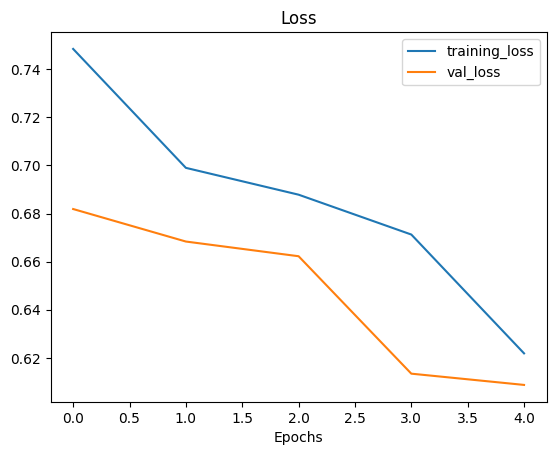

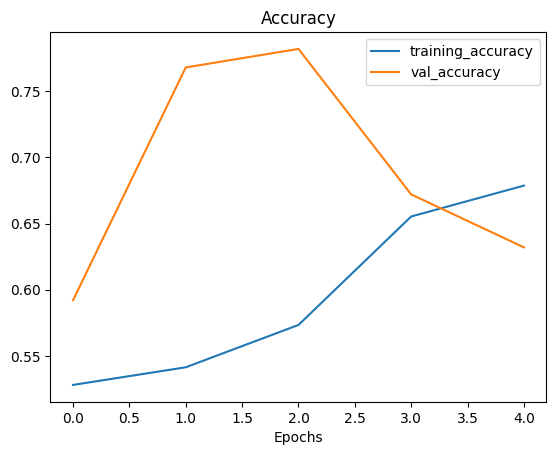

In [48]:
# Check model's performance history training on augmented data
plot_loss_curves(history_6)

<div dir="rtl">

يبدو أن منحنى خسارة التحقق من الصحة يتجه في الاتجاه الصحيح ولكنه متقلب بعض الشيء (منحنى الخسارة الأكثر مثالية ليس شائكًا للغاية ولكنه ينحدر بسلاسة، ومع ذلك، فإن منحنى الخسارة السلس تمامًا يعادل حكاية خيالية).

دعونا نرى ما يحدث عندما نخلط بيانات التدريب المعززة.

In [49]:
# Import data and augment it from directories
train_data_augmented_shuffled = train_datagen_augmented.flow_from_directory(train_dir,
                                                                            target_size=(224, 224),
                                                                            batch_size=32,
                                                                            class_mode='binary',
                                                                            shuffle=True) # Shuffle data (default)

Found 1500 images belonging to 2 classes.


In [50]:
# Create the model (same as model_5 and model_6)
model_7 = Sequential([
  Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
  MaxPool2D(),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Flatten(),
  Dense(1, activation='sigmoid')
])

# Compile the model
model_7.compile(loss='binary_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])

# Fit the model
history_7 = model_7.fit(train_data_augmented_shuffled, # now the augmented data is shuffled
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented_shuffled),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 14s 299ms/step - loss: 0.6786 - accuracy: 0.5800 - val_loss: 0.5857 - val_accuracy: 0.6940
Epoch 2/5
47/47 [==============================] - 14s 295ms/step - loss: 0.5912 - accuracy: 0.6807 - val_loss: 0.4486 - val_accuracy: 0.8160
Epoch 3/5
47/47 [==============================] - 14s 294ms/step - loss: 0.5224 - accuracy: 0.7500 - val_loss: 0.4146 - val_accuracy: 0.8180
Epoch 4/5
47/47 [==============================] - 14s 295ms/step - loss: 0.5056 - accuracy: 0.7547 - val_loss: 0.4318 - val_accuracy: 0.8060
Epoch 5/5
47/47 [==============================] - 14s 294ms/step - loss: 0.5052 - accuracy: 0.7713 - val_loss: 0.4028 - val_accuracy: 0.8440


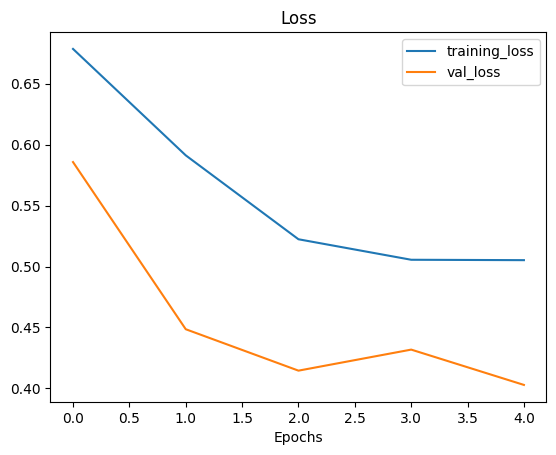

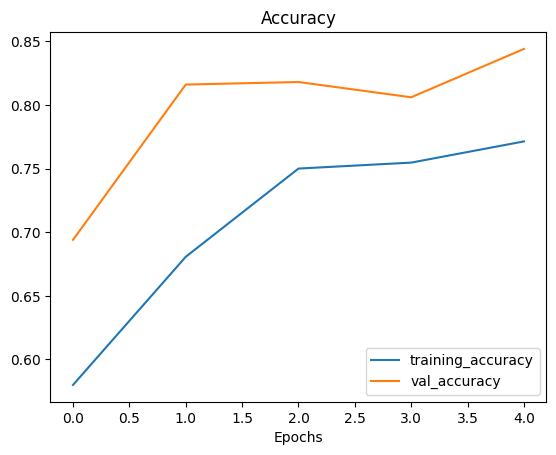

In [51]:
# Check model's performance history training on augmented data
plot_loss_curves(history_7)

<div dir="rtl">

##### لاحظ باستخدام `model_7` كيف يتحسن الأداء في مجموعة بيانات التدريب على الفور تقريبًا مقارنةً بـ`model_6`. وذلك لأننا قمنا بخلط بيانات التدريب أثناء تمريرها إلى النموذج باستخدام المعلمة `shuffle=True` في طريقة `flow_from_directory`.

##### وهذا يعني أن النموذج كان قادرًا على رؤية أمثلة لكل من صور البيتزا وشرائح اللحم في كل دفعة، وبالتالي يتم تقييمه بناءً على ما تعلمه من كلتا الصورتين بدلاً من نوع واحد فقط.

##### أيضًا، تبدو منحنيات الخسارة لدينا أكثر سلاسة مع البيانات المختلطة (مقارنة `history_6` بـ `history_7`).

<div dir="rtl">
    
### 7. كرر ذلك حتى الشبع

##### لقد قمنا بالفعل بتدريب عدد قليل من النماذج على مجموعة البيانات الخاصة بنا، وهم يقدمون أداءً جيدًا حتى الآن.

##### نظرًا لأننا تجاوزنا بالفعل خط الأساس لدينا، فهناك بعض الأشياء التي يمكننا تجربتها لمواصلة تحسين نموذجنا:
* زيادة عدد طبقات النموذج (على سبيل المثال، إضافة المزيد من الطبقات التلافيفية).
* زيادة عدد المرشحات في كل طبقة تلافيفية (على سبيل المثال، من 10 إلى 32، 64، أو 128، هذه الأرقام ليست ثابتة أيضًا، وعادةً ما يتم العثور عليها من خلال التجربة والخطأ).
* تدريب لفترة أطول (المزيد من العصور).
* إيجاد معدل التعلم المثالي .
* الحصول على المزيد من البيانات (امنح النموذج المزيد من الفرص للتعلم).
* استخدم **نقل التعلم** للاستفادة مما تعلمه نموذج صورة آخر وتعديله ليناسب حالة الاستخدام الخاصة بنا.

##### يُشار عادةً إلى ضبط كل من هذه الإعدادات (باستثناء الإعدادين الأخيرين) أثناء تطوير النموذج باسم **ضبط المعلمة الفائقة**.

##### يمكنك التفكير في ضبط المعلمة الفائقة على أنه مماثل لضبط إعدادات الفرن لديك لطهي طبقك المفضل. على الرغم من أن الفرن الخاص بك يقوم بمعظم عمليات الطهي نيابةً عنك، إلا أنه يمكنك المساعدة في ذلك عن طريق تعديل الأقراص.

##### دعنا نعود إلى حيث بدأنا ونجرب نموذجنا الأصلي (`model_1` أو بنية TinyVGG من [شرح CNN](https://poloclub.github.io/cnn-explainer/)).

In [52]:
# Create a CNN model (same as Tiny VGG but for binary classification - https://poloclub.github.io/cnn-explainer/ )
model_8 = Sequential([
  Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)), # same input shape as our images
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Conv2D(10, 3, activation='relu'),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Flatten(),
  Dense(1, activation='sigmoid')
])

# Compile the model
model_8.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fit the model
history_8 = model_8.fit(train_data_augmented_shuffled,
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented_shuffled),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 15s 302ms/step - loss: 0.6390 - accuracy: 0.6193 - val_loss: 0.5532 - val_accuracy: 0.6840
Epoch 2/5
47/47 [==============================] - 14s 295ms/step - loss: 0.5385 - accuracy: 0.7353 - val_loss: 0.4657 - val_accuracy: 0.7700
Epoch 3/5
47/47 [==============================] - 14s 295ms/step - loss: 0.5246 - accuracy: 0.7393 - val_loss: 0.3702 - val_accuracy: 0.8620
Epoch 4/5
47/47 [==============================] - 14s 294ms/step - loss: 0.4441 - accuracy: 0.8047 - val_loss: 0.3178 - val_accuracy: 0.8720
Epoch 5/5
47/47 [==============================] - 14s 298ms/step - loss: 0.4461 - accuracy: 0.7907 - val_loss: 0.3233 - val_accuracy: 0.8580


> 🔑 **ملاحظة:** ربما لاحظت أننا استخدمنا بعض الأكواد المختلفة قليلاً لبناء `model_8` مقارنةً بـ`model_1`. ويرجع ذلك إلى عمليات الاستيراد التي قمنا بها من قبل، مثل `من Tensorflow.keras.layers import Conv2D` مما يقلل من كمية التعليمات البرمجية التي يتعين علينا كتابتها. على الرغم من اختلاف الكود، إلا أن البنيات هي نفسها.

In [53]:
# Check model_1 architecture (same as model_8)
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 10)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 53, 53, 10)       0         
 2D)                                                    

In [54]:
# Check model_8 architecture (same as model_1)
model_8.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, 222, 222, 10)      280       
                                                                 
 conv2d_17 (Conv2D)          (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 110, 110, 10)     0         
 g2D)                                                            
                                                                 
 conv2d_18 (Conv2D)          (None, 108, 108, 10)      910       
                                                                 
 conv2d_19 (Conv2D)          (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 53, 53, 10)       0         
 g2D)                                                 

<div dir="rtl">

الآن دعونا نتحقق من أداء نموذج TinyVGG الخاص بنا.

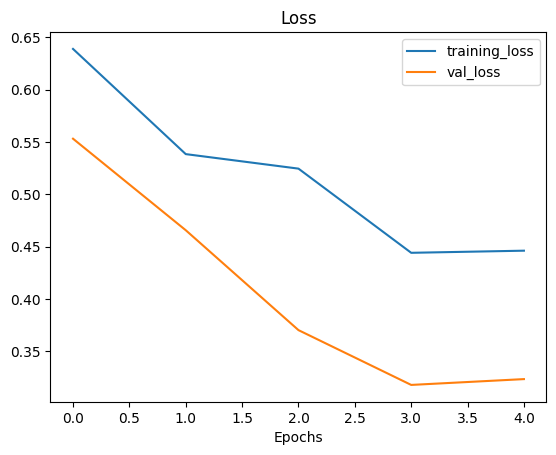

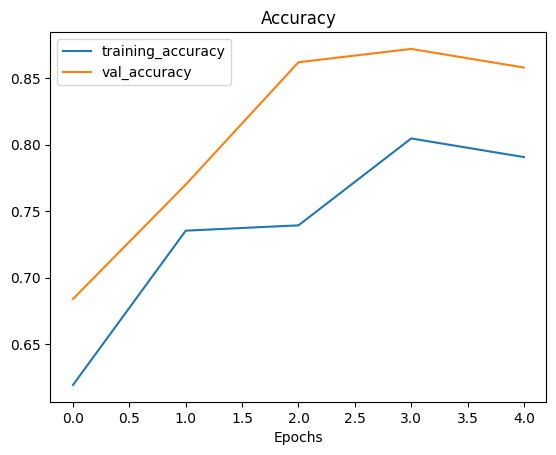

In [55]:
# Check out the TinyVGG model performance
plot_loss_curves(history_8)

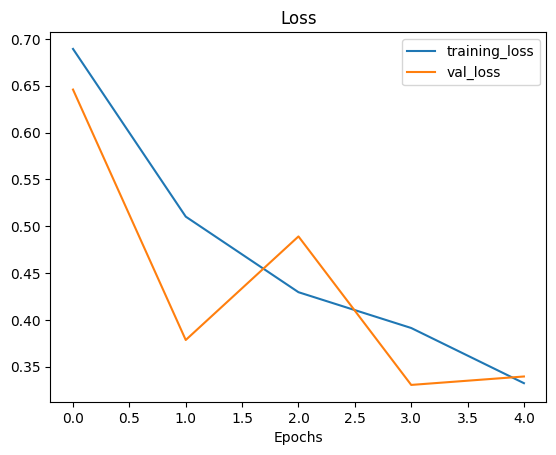

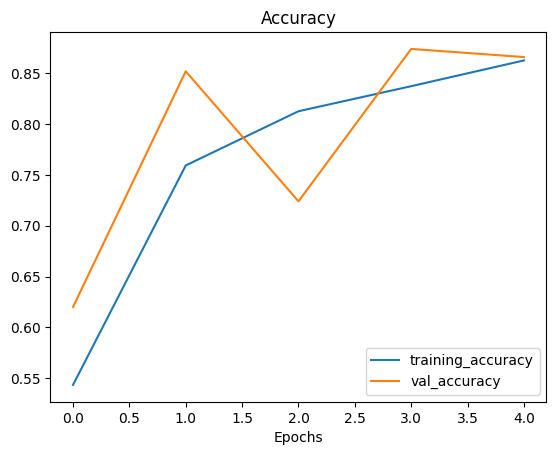

In [56]:
# How does this training curve look compared to the one above?
plot_loss_curves(history_1)

<div dir="rtl">

##### حسنًا، تبدو منحنيات التدريب لدينا جيدة، لكن أداء نموذجنا في مجموعات التدريب والاختبار لم يتحسن كثيرًا مقارنة بالنموذج السابق.

##### بإلقاء نظرة أخرى على منحنيات التدريب، يبدو أن أداء نموذجنا قد يتحسن إذا قمنا بتدريبه لفترة أطول قليلاً (المزيد من العصور).

##### ربما هذا شيء ترغب في تجربته؟

<div dir="rtl">

#### نموذج متقدم باستخدام نقل التعلم

In [57]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout

tf.random.set_seed(42)
random.seed(42)
np.random.seed(42)

# Load the MobileNet model without its top classification layer
base_model = tf.keras.applications.mobilenet.MobileNet(include_top=False, 
                                                       weights='imagenet', 
                                                       input_shape=(224, 224, 3))

# Freeze the base model's layers (optional, for feature extraction only)
for layer in base_model.layers:
    layer.trainable = False

# Create a custom top layer for our dataset
x = base_model.output
x = GlobalAveragePooling2D()(x)  # Convert features to vectors
x = Dense(1024, activation='relu')(x)  # Dense layer 1
x = Dropout(0.5)(x)
predictions = Dense(1, activation='sigmoid')(x)  # Dense layer 2


# Construct the full model
model_8_TL = Model(inputs=base_model.input, outputs=predictions)

# Compile the model
model_8_TL.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fit the model
history_8_TL = model_8_TL.fit(train_data_augmented_shuffled,
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented_shuffled),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 15s 303ms/step - loss: 0.6643 - accuracy: 0.7840 - val_loss: 0.0567 - val_accuracy: 0.9860
Epoch 2/5
47/47 [==============================] - 14s 295ms/step - loss: 0.1263 - accuracy: 0.9507 - val_loss: 0.0455 - val_accuracy: 0.9900
Epoch 3/5
47/47 [==============================] - 14s 296ms/step - loss: 0.1329 - accuracy: 0.9493 - val_loss: 0.0438 - val_accuracy: 0.9880
Epoch 4/5
47/47 [==============================] - 14s 295ms/step - loss: 0.1108 - accuracy: 0.9653 - val_loss: 0.0419 - val_accuracy: 0.9880
Epoch 5/5
47/47 [==============================] - 14s 294ms/step - loss: 0.0944 - accuracy: 0.9600 - val_loss: 0.0472 - val_accuracy: 0.9860


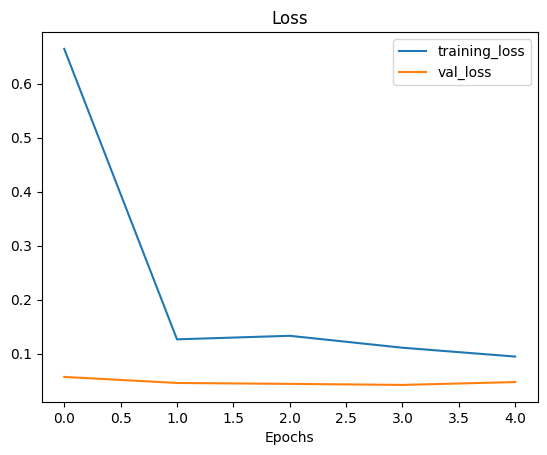

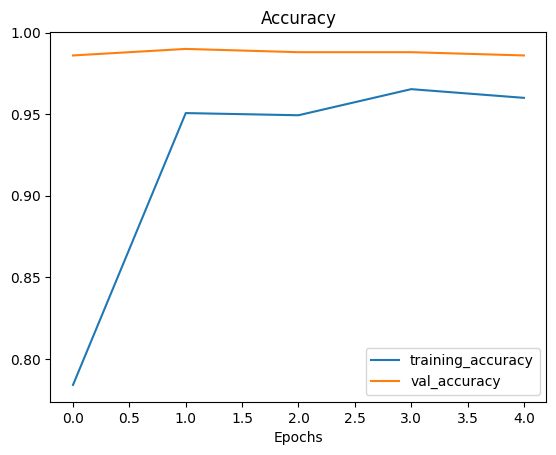

In [58]:
# How does this training curve look compared to the one above?
plot_loss_curves(history_8_TL)

In [59]:
#model_8_TL.summary()

In [60]:
model_8_TL.evaluate(test_data)

16/16 [==============================] - 1s 59ms/step - loss: 0.0472 - accuracy: 0.9860


[0.04715917631983757, 0.9860000014305115]

<div dir="rtl">

### التنبؤ باستخدام نموذجنا المدرّب

##### ما فائدة النموذج المدرب إذا لم تتمكن من التنبؤ به؟

##### لاختبار ذلك حقًا، سنقوم بتحميل بعض الصور الخاصة بنا ونرى كيف يسير النموذج.

##### أولاً، دعونا نذكر أنفسنا بأسماء الفئات ونشاهد الصورة التي سنختبرها.

In [61]:
# Classes we're working with
print(class_names)

['pizza' 'steak']


--2023-08-22 10:45:47--  https://kaust-my.sharepoint.com/:i:/g/personal/halimia_kaust_edu_sa/EWCOJcNBK3BHlax3LglXcS8Bzq6jjjKp2nscPFHPJIeK7g?download=1
Resolving kaust-my.sharepoint.com (kaust-my.sharepoint.com)... 52.107.243.76, 52.107.243.92, 52.107.243.73, ...
Connecting to kaust-my.sharepoint.com (kaust-my.sharepoint.com)|52.107.243.76|:443... connected.
HTTP request sent, awaiting response... 302 
Location: /personal/halimia_kaust_edu_sa/Documents/Trainings/Intro_deep_learning/03-steak.jpeg?ga=1 [following]
--2023-08-22 10:45:48--  https://kaust-my.sharepoint.com/personal/halimia_kaust_edu_sa/Documents/Trainings/Intro_deep_learning/03-steak.jpeg?ga=1
Reusing existing connection to kaust-my.sharepoint.com:443.
HTTP request sent, awaiting response... 200 OK
Length: 1978213 (1.9M) [image/jpeg]
Saving to: ‘steak.jpeg’

100%[======================================>] 1,978,213   1.58MB/s   in 1.2s   

2023-08-22 10:45:50 (1.58 MB/s) - ‘steak.jpeg’ saved [1978213/1978213]



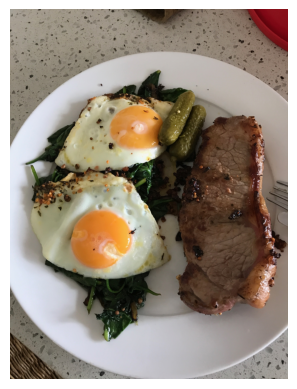

In [25]:
# View our example image
!wget -O "steak.jpeg"  https://kaust-my.sharepoint.com/:i:/g/personal/halimia_kaust_edu_sa/EWCOJcNBK3BHlax3LglXcS8Bzq6jjjKp2nscPFHPJIeK7g?download=1
steak = mpimg.imread("steak.jpeg")
plt.imshow(steak)
plt.axis(False);

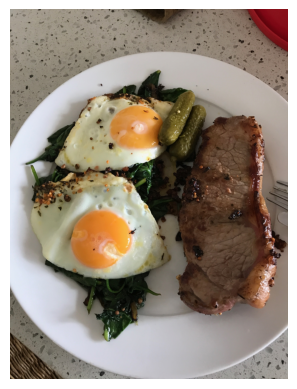

In [62]:
steak = mpimg.imread("steak.jpeg")
plt.imshow(steak)
plt.axis(False);

In [63]:
# Check the shape of our image
steak.shape

(4032, 3024, 3)

<div dir="rtl">


##### نظرًا لأن نموذجنا يأخذ صورًا للأشكال `(224، 224، 3)`، يتعين علينا إعادة تشكيل صورتنا المخصصة لاستخدامها مع نموذجنا.

##### للقيام بذلك، يمكننا استيراد صورتنا وفك تشفيرها باستخدام [`tf.io.read_file`](https://www.tensorflow.org/api_docs/python/tf/io/read_file) (لقراءة الملفات) و[` tf.image`](https://www.tensorflow.org/api_docs/python/tf/image) (لتغيير حجم صورتنا وتحويلها إلى موتر).

##### > 🔑 **ملاحظة:** لكي يتمكن نموذجك من إجراء تنبؤات بشأن البيانات غير المرئية، على سبيل المثال، صورك المخصصة، يجب أن تكون الصورة المخصصة بنفس الشكل الذي تم تدريب نموذجك عليه. بعبارات أكثر عمومية، لإجراء تنبؤات بشأن البيانات المخصصة، يجب أن تكون بنفس الشكل الذي تم تدريب نموذجك عليه.

In [64]:
# Create a function to import an image and resize it to be able to be used with our model
def load_and_prep_image(filename, img_shape=224):
  """
  Reads an image from filename, turns it into a tensor
  and reshapes it to (img_shape, img_shape, colour_channel).
  """
  # Read in target file (an image)
  img = tf.io.read_file(filename)

  # Decode the read file into a tensor & ensure 3 colour channels 
  # (our model is trained on images with 3 colour channels and sometimes images have 4 colour channels)
  img = tf.image.decode_image(img, channels=3)

  # Resize the image (to the same size our model was trained on)
  img = tf.image.resize(img, size = [img_shape, img_shape])

  # Rescale the image (get all values between 0 and 1)
  img = img/255.
  return img

<div dir="rtl">

الآن لدينا وظيفة لتحميل صورتنا المخصصة، فلنقم بتحميلها.

In [65]:
# Load in and preprocess our custom image
steak = load_and_prep_image("steak.jpeg")
steak

<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
array([[[0.6377451 , 0.6220588 , 0.57892156],
        [0.6504902 , 0.63186276, 0.5897059 ],
        [0.63186276, 0.60833335, 0.5612745 ],
        ...,
        [0.52156866, 0.05098039, 0.09019608],
        [0.49509802, 0.04215686, 0.07058824],
        [0.52843136, 0.07745098, 0.10490196]],

       [[0.6617647 , 0.6460784 , 0.6107843 ],
        [0.6387255 , 0.6230392 , 0.57598037],
        [0.65588236, 0.63235295, 0.5852941 ],
        ...,
        [0.5352941 , 0.06862745, 0.09215686],
        [0.529902  , 0.05931373, 0.09460784],
        [0.5142157 , 0.05539216, 0.08676471]],

       [[0.6519608 , 0.6362745 , 0.5892157 ],
        [0.6392157 , 0.6137255 , 0.56764704],
        [0.65637255, 0.6269608 , 0.5828431 ],
        ...,
        [0.53137255, 0.06470589, 0.08039216],
        [0.527451  , 0.06862745, 0.1       ],
        [0.52254903, 0.05196078, 0.0872549 ]],

       ...,

       [[0.49313724, 0.42745098, 0.31029412],
        [0.05

<div dir="rtl">

 رائع، صورتنا بتنسيق موتر، حان الوقت لتجربتها مع نموذجنا!

In [69]:
# Make a prediction on our custom image (spoiler: this won't work)
model_8.predict(steak)

ValueError: in user code:

    File "/home/halimia/miniconda3/envs/tf_pip_gpu_cloned/lib/python3.9/site-packages/keras/engine/training.py", line 2041, in predict_function  *
        return step_function(self, iterator)
    File "/home/halimia/miniconda3/envs/tf_pip_gpu_cloned/lib/python3.9/site-packages/keras/engine/training.py", line 2027, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/home/halimia/miniconda3/envs/tf_pip_gpu_cloned/lib/python3.9/site-packages/keras/engine/training.py", line 2015, in run_step  **
        outputs = model.predict_step(data)
    File "/home/halimia/miniconda3/envs/tf_pip_gpu_cloned/lib/python3.9/site-packages/keras/engine/training.py", line 1983, in predict_step
        return self(x, training=False)
    File "/home/halimia/miniconda3/envs/tf_pip_gpu_cloned/lib/python3.9/site-packages/keras/utils/traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/home/halimia/miniconda3/envs/tf_pip_gpu_cloned/lib/python3.9/site-packages/keras/engine/input_spec.py", line 295, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential_7" is incompatible with the layer: expected shape=(None, 224, 224, 3), found shape=(32, 224, 3)


<div dir="rtl">

 هناك مشكلة اخرى...

على الرغم من أن صورتنا لها نفس شكل الصور التي تم تدريب نموذجنا عليها، إلا أننا لا نزال نفتقد أحد الأبعاد.

هل تتذكر كيف تم تدريب نموذجنا على دفعات؟

حسنًا، يصبح حجم الدفعة هو البعد الأول.

لذا، في الواقع، تم تدريب نموذجنا على بيانات على شكل `(batch_size, 224, 224, 3)`.

يمكننا إصلاح ذلك عن طريق إضافة إضافة إلى موتر الصورة المخصص لدينا باستخدام [`tf.expand_dims`](https://www.tensorflow.org/api_docs/python/tf/expand_dims).

In [66]:
# Add an extra axis
print(f"Shape before new dimension: {steak.shape}")
steak = tf.expand_dims(steak, axis=0) # add an extra dimension at axis 0
#steak = steak[tf.newaxis, ...] # alternative to the above, '...' is short for 'every other dimension'
print(f"Shape after new dimension: {steak.shape}")
steak

Shape before new dimension: (224, 224, 3)
Shape after new dimension: (1, 224, 224, 3)


<tf.Tensor: shape=(1, 224, 224, 3), dtype=float32, numpy=
array([[[[0.6377451 , 0.6220588 , 0.57892156],
         [0.6504902 , 0.63186276, 0.5897059 ],
         [0.63186276, 0.60833335, 0.5612745 ],
         ...,
         [0.52156866, 0.05098039, 0.09019608],
         [0.49509802, 0.04215686, 0.07058824],
         [0.52843136, 0.07745098, 0.10490196]],

        [[0.6617647 , 0.6460784 , 0.6107843 ],
         [0.6387255 , 0.6230392 , 0.57598037],
         [0.65588236, 0.63235295, 0.5852941 ],
         ...,
         [0.5352941 , 0.06862745, 0.09215686],
         [0.529902  , 0.05931373, 0.09460784],
         [0.5142157 , 0.05539216, 0.08676471]],

        [[0.6519608 , 0.6362745 , 0.5892157 ],
         [0.6392157 , 0.6137255 , 0.56764704],
         [0.65637255, 0.6269608 , 0.5828431 ],
         ...,
         [0.53137255, 0.06470589, 0.08039216],
         [0.527451  , 0.06862745, 0.1       ],
         [0.52254903, 0.05196078, 0.0872549 ]],

        ...,

        [[0.49313724, 0.42745098, 

صورتنا المخصصة لها حجم دفعة 1! دعونا نتنبأ به.

In [67]:
# Make a prediction on custom image tensor
pred = model_8_TL.predict(steak)
pred

1/1 [==============================] - 0s 316ms/step


array([[0.9995301]], dtype=float32)

<div dir="rtl">

 آه، التوقعات تأتي في شكل **احتمالية التنبؤ**. بمعنى آخر، هذا يعني مدى احتمالية أن تكون الصورة فئة أو أخرى.

نظرًا لأننا نعمل على مشكلة تصنيف ثنائي، إذا كان احتمال التنبؤ أكبر من 0.5، وفقًا للنموذج، فمن المرجح أن يكون التنبؤ **الفئة الإيجابية** (الفئة 1).

وإذا كان احتمال التنبؤ أقل من 0.5، وفقًا للنموذج، فمن المرجح أن تكون الفئة المتوقعة هي **الفئة السلبية** (الفئة 0).

> 🔑 **ملاحظة:** يمكن تعديل الحد الفاصل بمقدار 0.5 حسب رغبتك. على سبيل المثال، يمكنك تعيين الحد ليكون 0.8 وأكثر للفئة الإيجابية و0.2 للفئة السالبة. ومع ذلك، سيؤدي القيام بذلك دائمًا إلى تغيير مقاييس أداء النموذج الخاص بك، لذا تأكد من تغييرها في الاتجاه الصحيح.

لكن قول فئة إيجابية وسلبية ليس له معنى كبير عندما نعمل مع البيتزا 🍕 وشرائح اللحم 🥩...

لذلك دعونا نكتب دالة صغيرة لتحويل التنبؤات إلى أسماء فئاتها ثم نرسم الصورة المستهدفة.

In [68]:
# Remind ourselves of our class names
class_names

array(['pizza', 'steak'], dtype='<U5')

In [69]:
# We can index the predicted class by rounding the prediction probability
pred_class = class_names[int(tf.round(pred)[0][0])]
pred_class

'steak'

In [70]:
def pred_and_plot(model, filename, class_names):
  """
  Imports an image located at filename, makes a prediction on it with
  a trained model and plots the image with the predicted class as the title.
  """
  # Import the target image and preprocess it
  img = load_and_prep_image(filename)

  # Make a prediction
  pred = model.predict(tf.expand_dims(img, axis=0))

  # Get the predicted class
  pred_class = class_names[int(tf.round(pred)[0][0])]

  # Plot the image and predicted class
  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False);

1/1 [==============================] - 0s 25ms/step


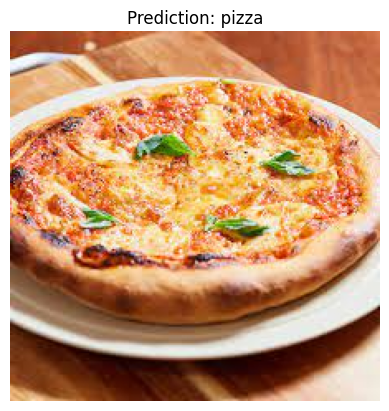

In [71]:
# Test our model on a custom image
pred_and_plot(model_8_TL, "pizza.jpg", class_names)

<div dir="rtl">

 -جيد! لقد حصل نموذجنا على التنبؤ الصحيح.

دعونا نجرب صورة أخرى.

<div dir="rtl">

### اجعلها أكثر تفاعلية وتطورًا مع GRADIO

In [72]:
def food_vision(image):
    img = tf.image.resize(image, size=(224, 224))
    img = img / 255. # Normalize if required
    img = tf.expand_dims(img, axis=0) # Make image tensor right size for model
    #img = tf.convert_to_tensor(img, dtype=tf.float32) # Convert to tensor if needed
    pred_prob = model_8_TL.predict(img)[0][0] # Get the probability for the positive class
    
    # Get the class index by rounding the prediction probability
    class_index = int(tf.round(pred_prob))
    
    # Create a dictionary to hold the class names and their corresponding probabilities
    class_probabilities = {
        class_names[0]: float(1 - pred_prob),
        class_names[1]: float(pred_prob),
    }

    # Return the class name with the highest probability along with the probabilities
    return class_names[class_index], class_probabilities

In [93]:
import gradio as gr

# Use components instead of inputs and outputs
from gradio import components as grc

# Define the interface
interface = gr.Interface(
    fn=food_vision,  # Replace with your actual function name
    inputs=grc.Image(height=400), #shape=(224, 224)
    outputs=[
        grc.Label(),
        grc.Label(label="Confidence", num_top_classes=2)
    ]

)

# Launch the interface
#interface.launch(share=True, debug=True)
interface.launch(share=True, debug=True)

# http://localhost:7860        ?__theme=dark

Running on local URL:  http://127.0.0.1:7861
Running on public URL: https://35901c43c55531b79e.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


1/1 [==============================] - 0s 157ms/step
Keyboard interruption in main thread... closing server.
Killing tunnel 127.0.0.1:7861 <> https://35901c43c55531b79e.gradio.live


<div dir="rtl">

## تصنيف متعدد الطبقات

##### لقد قمنا بالإشارة إلى بنية TinyVGG من موقع CNN Explaner عدة مرات من خلال هذا الدفتر، ومع ذلك، يعمل موقع CNN Explaner مع 10 فئات مختلفة من الصور، حيث يعمل نموذجنا الحالي فقط مع فئتين (البيتزا وشرائح اللحم).

##### > 🛠 **التدريب:** قبل التمرير للأسفل، كيف تعتقد أنه يمكننا تغيير نموذجنا للعمل مع 10 فئات من نفس النوع من الصور؟ افترض أن البيانات بنفس نمط مسألتنا ذات الصنفين.

##### هل تتذكر الخطوات التي اتخذناها من قبل لإعداد مصنف البيتزا 🍕 مقابل شرائح اللحم 🥩؟

##### ما رأيك أن نتبع هذه الخطوات مرة أخرى، باستثناء هذه المرة، سنتعامل مع 10 أنواع مختلفة من الطعام.

1. كن واحدًا مع البيانات (تصور، تصور، تصور...)
2. المعالجة المسبقة للبيانات (إعدادها لنموذج)
3. إنشاء نموذج (ابدأ بخط الأساس)
4. تناسب النموذج
5. تقييم النموذج
6. ضبط المعلمات المختلفة وتحسين النموذج (حاول التغلب على خط الأساس الخاص بك)
7. كرر ذلك حتى تشعر بالرضا

<img src="images/Picture1.png" alt="picture1" />

##### *سير العمل الذي نحن على وشك المرور به هو نسخة معدلة قليلاً من الصورة أعلاه. مع استمرارك في حل مشكلات التعلم العميق، ستجد أن سير العمل أعلاه هو مجرد مخطط تفصيلي أكثر من كونه دليلًا خطوة بخطوة.*

<div dir="rtl">

### 1. قم باستيراد البيانات والانضمام إليها

##### مرة أخرى، لدينا مجموعة فرعية من [مجموعة بيانات Food101](https://www.kaggle.com/dansbecker/food-101). بالإضافة إلى صور البيتزا وشرائح اللحم، قمنا بسحب ثمانية فصول أخرى.

##### قم بتنزيل الملف المضغوط

In [66]:
!wget -O "10_food_classes_all_data.zip" https://kaust-my.sharepoint.com/:u:/g/personal/halimia_kaust_edu_sa/EWcqevFbyCVPj-P8QPf80hQB09sSTvKWX29nYw9EgpMvyQ?download=1

--2023-08-07 08:42:09--  https://kaust-my.sharepoint.com/:u:/g/personal/halimia_kaust_edu_sa/EWcqevFbyCVPj-P8QPf80hQB09sSTvKWX29nYw9EgpMvyQ?download=1
Resolving kaust-my.sharepoint.com (kaust-my.sharepoint.com)... 13.107.138.8, 13.107.136.8, 2620:1ec:8f8::8
Connecting to kaust-my.sharepoint.com (kaust-my.sharepoint.com)|13.107.138.8|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /personal/halimia_kaust_edu_sa/Documents/Trainings/Intro_deep_learning/10_food_classes_all_data.zip?ga=1 [following]
--2023-08-07 08:42:10--  https://kaust-my.sharepoint.com/personal/halimia_kaust_edu_sa/Documents/Trainings/Intro_deep_learning/10_food_classes_all_data.zip?ga=1
Reusing existing connection to kaust-my.sharepoint.com:443.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/x-zip-compressed]
Saving to: ‘10_food_classes_all_data.zip’

100%[======================================>] 519,183,241 4.76MB/s   in 1m 59s 

2023-08-07 08:44:09 (

##### قم بفك ضغط الملف الذي تم تنزيله

In [ ]:
import zipfile

# Unzip the downloaded file
zip_ref = zipfile.ZipFile("10_food_classes_all_data.zip", "r")
zip_ref.extractall()
zip_ref.close()

<div dir="rtl">

الآن دعونا نتحقق من جميع الدلائل والأدلة الفرعية المختلفة في ملف `10_food_classes`.

##### قراءة البيانات

In [1]:
import os

# Walk through 10_food_classes directory and list number of files
for dirpath, dirnames, filenames in os.walk("10_food_classes_all_data"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in '10_food_classes_all_data'.
There are 10 directories and 0 images in '10_food_classes_all_data/test'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/grilled_salmon'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/ice_cream'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/pizza'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/fried_rice'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/chicken_wings'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/ramen'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/chicken_curry'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/hamburger'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/steak'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/sushi'.
There are 

<div dir="rtl">

تبدو جيدة!

سنقوم الآن بإعداد مسارات دليل التدريب والاختبار.

In [94]:
train_dir = "10_food_classes_all_data/train/"
test_dir = "10_food_classes_all_data/test/"

<div dir="rtl">

واحصل على أسماء الفئات من الدلائل الفرعية.

In [95]:
# Get the class names for our multi-class dataset
import pathlib
import numpy as np
data_dir = pathlib.Path(train_dir)
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)

['chicken_curry' 'chicken_wings' 'fried_rice' 'grilled_salmon' 'hamburger'
 'ice_cream' 'pizza' 'ramen' 'steak' 'sushi']


<div dir="rtl">

ماذا عن تصور صورة من مجموعة التدريب؟

Image shape: (512, 512, 3)


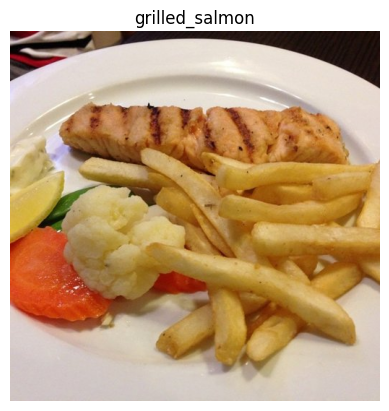

In [96]:
# View a random image from the training dataset
import random
img = view_random_image(target_dir=train_dir,
                        target_class=random.choice(class_names)) # get a random class name

<div dir="rtl">

### 2. المعالجة المسبقة للبيانات (تحضيرها لنموذج)

##### بعد الاطلاع على عدد قليل من الصور (من الجيد تصور ما لا يقل عن 10 إلى 100 مثال مختلف)، يبدو أن أدلة البيانات الخاصة بنا تم إعدادها بشكل صحيح.

##### حان الوقت للمعالجة المسبقة للبيانات.

In [97]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Rescale the data and create data generator instances
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

# Load data in from directories and turn it into batches
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224, 224),
                                               batch_size=32,
                                               class_mode='categorical') # changed to categorical

test_data = train_datagen.flow_from_directory(test_dir,
                                              target_size=(224, 224),
                                              batch_size=32,
                                              class_mode='categorical')

Found 7502 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


<div dir="rtl">

##### كما هو الحال مع التصنيف الثنائي، قمنا بإنشاء مولدات للصور. التغيير الرئيسي هذه المرة هو أننا قمنا بتغيير المعلمة "class_mode" إلى "فئوية" لأننا نتعامل مع 10 فئات من صور الطعام.

##### كل شيء آخر مثل إعادة قياس الصور وإنشاء حجم الدُفعة وحجم الصورة المستهدف يظل كما هو.

##### > 🤔 **السؤال:** لماذا حجم الصورة 224x224؟ يمكن أن يكون هذا في الواقع بأي حجم أردناه، ومع ذلك، فإن 224 × 224 هو حجم شائع جدًا لمعالجة الصور مسبقًا. اعتمادا على مشكلتك، قد ترغب في استخدام صور أكبر أو أصغر.

<div dir="rtl">

### 3. إنشاء نموذج (ابدأ بخط الأساس)

##### يمكننا استخدام نفس النموذج (TinyVGG) الذي استخدمناه في مشكلة التصنيف الثنائي لمشكلة التصنيف متعدد الفئات لدينا مع بعض التعديلات الصغيرة.

##### يسمى:
* تغيير طبقة الإخراج لاستخدامها تحتوي على 10 خلايا عصبية مخرجة (نفس عدد الفئات التي لدينا).
* تغيير طبقة الإخراج لاستخدام التنشيط "softmax" بدلاً من التنشيط "sigmoid".
* تغيير دالة الخسارة لتصبح "categorical_crossentropy" بدلاً من "binary_crossentropy".

In [98]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense

# Create our model (a clone of model_8, except to be multi-class)
model_9 = Sequential([
  Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Conv2D(10, 3, activation='relu'),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Flatten(),
  Dense(10, activation='softmax') # changed to have 10 neurons (same as number of classes) and 'softmax' activation
])

# Compile the model
model_9.compile(loss="categorical_crossentropy", # changed to categorical_crossentropy
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

<div dir="rtl">

### 4. تناسب النموذج

##### الآن لدينا نموذج مناسب للعمل مع فئات متعددة، فلنلائمه مع بياناتنا.

In [99]:
# Fit the model
history_9 = model_9.fit(train_data, # now 10 different classes 
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 20s 83ms/step - loss: 2.1105 - accuracy: 0.2305 - val_loss: 1.9691 - val_accuracy: 0.3048
Epoch 2/5
235/235 [==============================] - 19s 82ms/step - loss: 1.8321 - accuracy: 0.3683 - val_loss: 1.9238 - val_accuracy: 0.3540
Epoch 3/5
235/235 [==============================] - 18s 78ms/step - loss: 1.4901 - accuracy: 0.4959 - val_loss: 1.9421 - val_accuracy: 0.3328
Epoch 4/5
235/235 [==============================] - 19s 80ms/step - loss: 0.9238 - accuracy: 0.6946 - val_loss: 2.4079 - val_accuracy: 0.3200
Epoch 5/5
235/235 [==============================] - 19s 79ms/step - loss: 0.4091 - accuracy: 0.8755 - val_loss: 3.2457 - val_accuracy: 0.2904


<div dir="rtl">

##### لماذا تعتقد أن كل عصر يستغرق وقتًا أطول من العمل مع فئتين فقط من الصور؟

##### ذلك لأننا نتعامل الآن مع صور أكثر مما كنا عليه من قبل. لدينا 10 فصول تحتوي على 750 صورة تدريبية و250 صورة تحقق يبلغ إجمالي كل منها 10000 صورة. حيث أنه عندما كان لدينا فصلين، كان لدينا 1500 صورة تدريب و500 صورة للتحقق، بإجمالي 2000.

##### المنطق البديهي هنا هو أنه كلما زادت البيانات التي لديك، كلما استغرق النموذج وقتًا أطول للعثور على الأنماط.

<div dir="rtl">

### 5. تقييم النموذج

##### رائع! لقد قمنا للتو بتدريب نموذج على 10 فئات مختلفة من صور الطعام، دعونا نرى كيف سارت الأمور.

In [100]:
# Evaluate on the test data
model_9.evaluate(test_data)

79/79 [==============================] - 5s 60ms/step - loss: 3.2457 - accuracy: 0.2904


[3.2457284927368164, 0.2903999984264374]

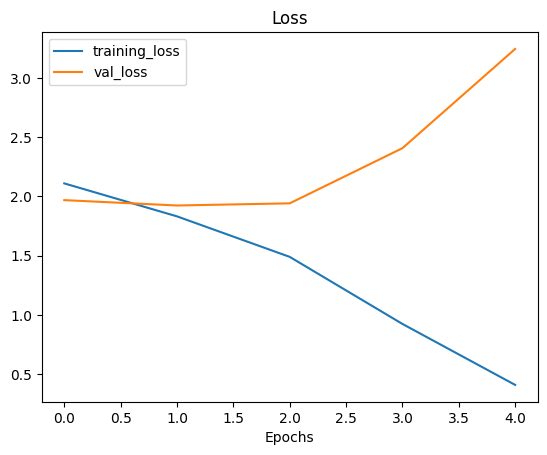

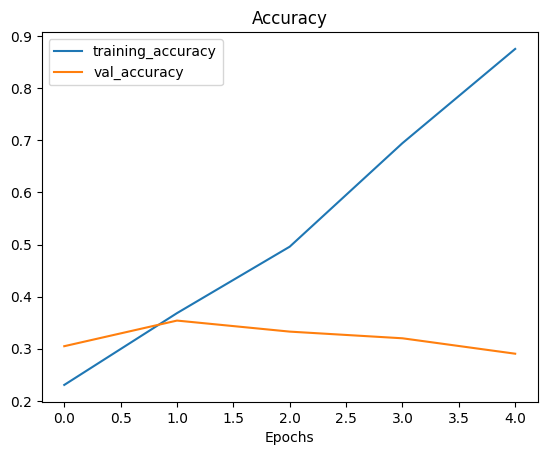

In [101]:
# Check out the model's loss curves on the 10 classes of data (note: this function comes from above in the notebook)
plot_loss_curves(history_9)

<div dir="rtl">
    
##### واو، هذه هي الفجوة تمامًا بين منحنيات فقدان التدريب والتحقق من الصحة.

##### ما يخبرنا هذا الكلام؟

##### يبدو أن نموذجنا **يبالغ في التجهيز** لمجموعة التدريب بشكل سيء للغاية. بمعنى آخر، إنها تحصل على نتائج رائعة فيما يتعلق ببيانات التدريب ولكنها تفشل في التعميم الجيد على البيانات غير المرئية ويكون أداؤها سيئًا على بيانات الاختبار.

<div dir="rtl">

### 6. ضبط معلمات النموذج

##### نظرًا لأدائه في بيانات التدريب، فمن الواضح أن نموذجنا يتعلم شيئًا ما. ومع ذلك، فإن الأداء الجيد في بيانات التدريب يشبه الأداء الجيد في الفصل الدراسي ولكنك تفشل في استخدام مهاراتك في الحياة الواقعية.

##### من الناحية المثالية، نود أن يعمل نموذجنا على بيانات الاختبار بشكل جيد كما هو الحال في بيانات التدريب.

##### لذلك ستكون خطواتنا التالية هي محاولة منع الإفراط في ملائمة نموذجنا. تتضمن بعض الطرق لمنع التجهيز الزائد ما يلي:

- **الحصول على المزيد من البيانات** - إن الحصول على المزيد من البيانات يمنح النموذج المزيد من الفرص لتعلم الأنماط، وهي الأنماط التي قد تكون أكثر قابلية للتعميم على الأمثلة الجديدة.
- **تبسيط النموذج** - إذا كان النموذج الحالي يقوم بالفعل بتجاوز بيانات التدريب، فقد يكون النموذج معقدًا جدًا. وهذا يعني أنه يتعلم أنماط البيانات بشكل جيد للغاية ولا يمكنه التعميم بشكل جيد على البيانات غير المرئية. إحدى طرق تبسيط النموذج هي تقليل عدد الطبقات التي يستخدمها أو تقليل عدد الوحدات المخفية في كل طبقة.
- **استخدام زيادة البيانات** - تعمل زيادة البيانات على معالجة بيانات التدريب بطريقة يصعب على النموذج تعلمها لأنها تضيف المزيد من التنوع إلى البيانات بشكل مصطنع. إذا كان النموذج قادرًا على تعلم الأنماط في البيانات المعززة، فقد يكون النموذج قادرًا على تعميم البيانات غير المرئية بشكل أفضل.
- **استخدام التعلم النقلي** - يتضمن التعلم النقلي تعزيز الأنماط (وتسمى أيضًا الأوزان المدربة مسبقًا) التي تعلم أحد النماذج استخدامها كأساس لمهمتك الخاصة. في حالتنا، يمكننا استخدام نموذج رؤية حاسوبي واحد تم تدريبه مسبقًا على مجموعة كبيرة ومتنوعة من الصور ثم تعديله قليلاً ليكون أكثر تخصصًا لصور الطعام.

##### > 🔑 **ملاحظة:** يُشار إلى منع التجاوز أيضًا باسم **الانتظام**.

##### إذا كان لديك بالفعل مجموعة بيانات موجودة، فمن المرجح أن تجرب واحدًا أو مجموعة من الخيارات الثلاثة الأخيرة المذكورة أعلاه أولاً.

##### نظرًا لأن جمع المزيد من البيانات سيتطلب منا التقاط المزيد من صور الطعام يدويًا، فلنجرب الصور التي يمكننا القيام بها من داخل دفتر الملاحظات مباشرةً.

##### ماذا عن تبسيط نموذجنا أولًا؟

##### للقيام بذلك، سنقوم بإزالة اثنتين من الطبقات التلافيفية، مما يجعل العدد الإجمالي للطبقات التلافيفية من أربع إلى اثنتين.

In [102]:
# Try a simplified model (removed two layers)
model_10 = Sequential([
  Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
  MaxPool2D(),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Flatten(),
  Dense(10, activation='softmax')
])

model_10.compile(loss='categorical_crossentropy',
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=['accuracy'])

history_10 = model_10.fit(train_data,
                          epochs=5,
                          steps_per_epoch=len(train_data),
                          validation_data=test_data,
                          validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 19s 80ms/step - loss: 2.1001 - accuracy: 0.2426 - val_loss: 1.9514 - val_accuracy: 0.3108
Epoch 2/5
235/235 [==============================] - 19s 79ms/step - loss: 1.7158 - accuracy: 0.4200 - val_loss: 2.0388 - val_accuracy: 0.3184
Epoch 3/5
235/235 [==============================] - 18s 78ms/step - loss: 1.2673 - accuracy: 0.5800 - val_loss: 2.0130 - val_accuracy: 0.3376
Epoch 4/5
235/235 [==============================] - 19s 80ms/step - loss: 0.7883 - accuracy: 0.7555 - val_loss: 2.3409 - val_accuracy: 0.3176
Epoch 5/5
235/235 [==============================] - 19s 80ms/step - loss: 0.4074 - accuracy: 0.8890 - val_loss: 2.9413 - val_accuracy: 0.3088


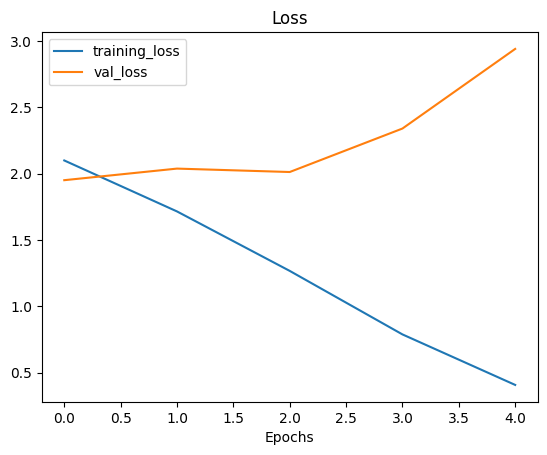

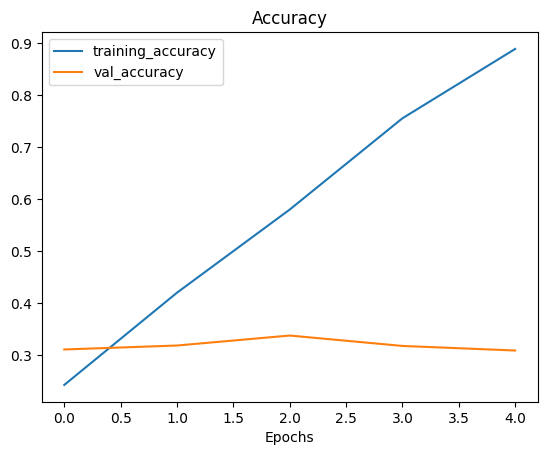

In [103]:
# Check out the loss curves of model_10
plot_loss_curves(history_10)

<div dir="rtl">

##### حسنًا... حتى مع وجود نموذج مبسط، يبدو أن نموذجنا لا يزال يبالغ في ملاءمة بيانات التدريب بشكل كبير.

##### ماذا يمكننا أن نحاول؟

##### ماذا عن **زيادة البيانات**؟

##### إن زيادة البيانات تجعل من الصعب على النموذج أن يتعلم من بيانات التدريب، وبالتالي، نأمل أن تجعل الأنماط التي يتعلمها أكثر قابلية للتعميم على البيانات غير المرئية.

##### لإنشاء بيانات معززة، سنعيد إنشاء مثيل [`ImageDataGenerator`](https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator) جديد، مع إضافة بعض المعلمات هذه المرة مثل "نطاق_التدوير" و"القلب_الأفقي" لمعالجة صورنا.

In [104]:
# Create augmented data generator instance
train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                             rotation_range=20, # note: this is an int not a float
                                             width_shift_range=0.2,
                                             height_shift_range=0.2,
                                             zoom_range=0.2,
                                             horizontal_flip=True)

train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                  target_size=(224, 224),
                                                                  batch_size=32,
                                                                  class_mode='categorical',
                                                                  shuffle=True)

Found 7502 images belonging to 10 classes.


<div dir="rtl">

##### الآن لدينا بيانات معززة، دعونا نرى كيف تعمل مع نفس النموذج كما كان من قبل (`model_10`).

##### بدلاً من إعادة كتابة النموذج من الصفر، يمكننا استنساخه باستخدام وظيفة سهلة الاستخدام في TensorFlow تسمى [`clone_model`](https://www.tensorflow.org/api_docs/python/tf/keras/models/clone_model) والتي يمكن أن تستغرق وقتًا طويلاً نموذج موجود وإعادة بنائه بنفس التنسيق.

##### لن تتضمن النسخة المستنسخة أيًا من الأوزان (الأنماط) التي تعلمها النموذج الأصلي. لذلك عندما ندربه، سيكون الأمر مثل تدريب نموذج من الصفر.

##### > 🔑 **ملاحظة:** إحدى الممارسات الأساسية في التعلم العميق والتعلم الآلي بشكل عام هي **أن تكون مجربًا متسلسلًا**. هذا ما نفعله هنا. تجربة شيء ما، ومعرفة ما إذا كان يعمل، ثم تجربة شيء آخر. يقوم إعداد التجربة الجيدة أيضًا بتتبع الأشياء التي تغيرها، على سبيل المثال، ولهذا السبب نستخدم نفس النموذج كما كان من قبل ولكن مع بيانات مختلفة. يظل النموذج كما هو ولكن البيانات تتغير، وهذا سيسمح لنا بمعرفة ما إذا كانت بيانات التدريب المعززة لها أي تأثير على الأداء.

<div dir="rtl">

### 7. كرر ذلك حتى تشعر بالرضا

##### يمكننا الاستمرار هنا. إعادة هيكلة بنية نموذجنا، وإضافة المزيد من الطبقات، وتجربته، وضبط معدل التعلم، وتجربته، وتجربة طرق مختلفة لزيادة البيانات، والتدريب لفترة أطول. ولكن كما يمكنك أن تتخيل، قد يستغرق هذا وقتًا طويلاً إلى حد ما.

##### من الجيد أنه لا تزال هناك خدعة واحدة لم نجربها بعد وهي **نقل التعلم**.

In [105]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

tf.random.set_seed(42)
#random.seed(42)
np.random.seed(42)

# Load the MobileNet model without its top classification layer
base_model = tf.keras.applications.mobilenet.MobileNet(include_top=False, 
                                                       weights='imagenet', 
                                                       input_shape=(224, 224, 3))

# base_model = tf.keras.applications.inception_resnet_v2.InceptionResNetV2(include_top=False, 
#                                                        weights='imagenet', 
#                                                        input_shape=(224, 224, 3))

# Freeze the base model's layers (optional, for feature extraction only)
for layer in base_model.layers:
    layer.trainable = False

# Create a custom top layer for our dataset
x = base_model.output
x = GlobalAveragePooling2D()(x)  # Convert features to vectors
x = Dense(1024, activation='relu')(x)  # Dense layer 1
x = Dropout(0.5)(x)
predictions = Dense(10, activation='softmax')(x)  # Dense layer 2


# Construct the full model
model_11 = Model(inputs=base_model.input, outputs=predictions)

# Compile the model
model_11.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fit the model
history_11_TL = model_11.fit(train_data_augmented,
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 72s 303ms/step - loss: 1.1878 - accuracy: 0.6209 - val_loss: 0.5326 - val_accuracy: 0.8244
Epoch 2/5
235/235 [==============================] - 69s 294ms/step - loss: 0.8317 - accuracy: 0.7290 - val_loss: 0.4769 - val_accuracy: 0.8408
Epoch 3/5
235/235 [==============================] - 70s 297ms/step - loss: 0.7556 - accuracy: 0.7515 - val_loss: 0.4650 - val_accuracy: 0.8420
Epoch 4/5
235/235 [==============================] - 69s 294ms/step - loss: 0.7173 - accuracy: 0.7681 - val_loss: 0.4799 - val_accuracy: 0.8380
Epoch 5/5
235/235 [==============================] - 69s 296ms/step - loss: 0.6984 - accuracy: 0.7641 - val_loss: 0.4173 - val_accuracy: 0.8592


<div dir="rtl">

 يمكنك أن ترى أن كل عصر يستغرق وقتًا أطول من النموذج السابق. وذلك لأن بياناتنا يتم تعزيزها بسرعة على وحدة المعالجة المركزية حيث يتم تحميلها على وحدة معالجة الرسومات، مما يؤدي بدوره إلى زيادة مقدار الوقت بين كل فترة.

كيف تبدو منحنيات التدريب في نموذجنا؟

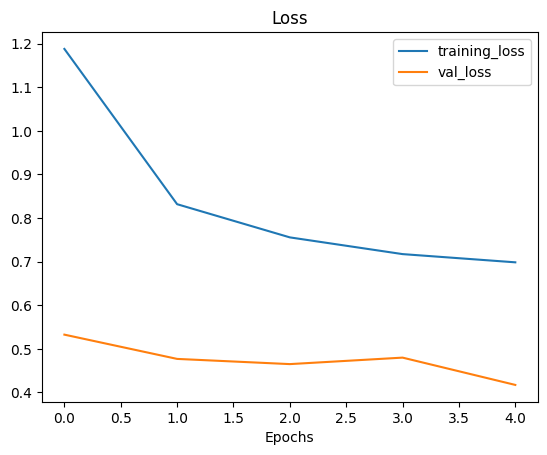

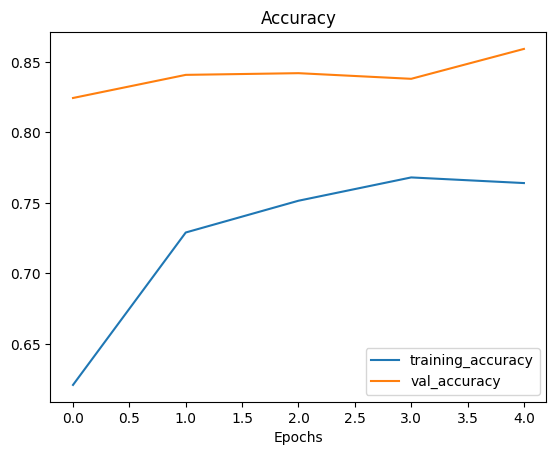

In [106]:
# Check out our model's performance with augmented data
plot_loss_curves(history_11_TL)

In [107]:
#model_11.summary()

<div dir="rtl">

واو! وهذا يبدو أفضل بكثير، فمنحنيات الخسارة أقرب بكثير إلى بعضها البعض. على الرغم من أن نموذجنا لم يكن أداؤه جيدًا في مجموعة التدريب المعزز، إلا أنه كان أداؤه أفضل بكثير في مجموعة بيانات التحقق من الصحة.

حتى أنه يبدو أنه إذا واصلنا تدريبه لفترة أطول (لمزيد من العصور)، فقد تستمر مقاييس التقييم في التحسن.

<div dir="rtl">

## التنبؤ باستخدام نموذجنا المدرّب

##### ما فائدة النموذج إذا لم تتمكن من التنبؤ به؟

##### دعونا نذكر أنفسنا أولاً بالفصول الدراسية التي تم تدريب نموذجنا متعدد الفئات عليها، ثم سنقوم بتنزيل بعض الصور المخصصة للعمل عليها.

In [108]:
# What classes has our model been trained on?
class_names

array(['chicken_curry', 'chicken_wings', 'fried_rice', 'grilled_salmon',
       'hamburger', 'ice_cream', 'pizza', 'ramen', 'steak', 'sushi'],
      dtype='<U14')

<div dir="rtl">
    
##### جميل، الآن دعونا نحصل على بعض الصور المخصصة لدينا.

##### إذا كنت تستخدم Google Colab، فيمكنك أيضًا تحميل بعض الصور الخاصة بك عبر علامة تبويب الملفات.

In [126]:
# -q is for "quiet"
!wget -O "pizza.jpg" -q https://kaust-my.sharepoint.com/:i:/g/personal/halimia_kaust_edu_sa/EZPulY5acXNBhl7Yl7B3bzABxkUTZnBzjZeXY0lX0MhPOA?download=1
!wget -O "salmon.jpg" -q https://kaust-my.sharepoint.com/:i:/g/personal/halimia_kaust_edu_sa/EdqlfforfRdLnRsoHyx46CEBWcaDtoeWDurVZ1Epn6cwnw?download=1
!wget -O "hamburger.jpeg" -q  https://kaust-my.sharepoint.com/:i:/g/personal/halimia_kaust_edu_sa/ERy1tHogf29CiNJTMQPuODoBYutS9ncSiKs1V2hq3ZlsYg?download=1
!wget -O "sushi.jpeg" -q https://kaust-my.sharepoint.com/:i:/g/personal/halimia_kaust_edu_sa/EaMc73QftjVIn8fFYpqi7LcBop_fN_El1RdUMZz0vLkY4A?download=1
!wget -O "chicken_wings.jpeg" -q https://kaust-my.sharepoint.com/:i:/g/personal/halimia_kaust_edu_sa/EfrWlJMv7_hIsBP5YfO49ZMBcM2A_9vxav50fbdxzN070A?download=1


<div dir="rtl">

 حسنًا، لدينا بعض الصور المخصصة لتجربتها، فلنستخدم وظيفة `pred_and_plot` لإجراء تنبؤ باستخدام `model_11` على إحدى الصور ورسمها.

In [109]:
# Create a function to import an image and resize it to be able to be used with our model
def load_and_prep_image(filename, img_shape=224):
  """
  Reads an image from filename, turns it into a tensor
  and reshapes it to (img_shape, img_shape, colour_channel).
  """
  # Read in target file (an image)
  img = tf.io.read_file(filename)

  # Decode the read file into a tensor & ensure 3 colour channels 
  # (our model is trained on images with 3 colour channels and sometimes images have 4 colour channels)
  img = tf.image.decode_image(img, channels=3)

  # Resize the image (to the same size our model was trained on)
  img = tf.image.resize(img, size = [img_shape, img_shape])

  # Rescale the image (get all values between 0 and 1)
  img = img/255.
  return img

<div dir="rtl">

بمعرفة ذلك، يمكننا إعادة ضبط دالة `pred_and_plot` الخاصة بنا للعمل مع فئات متعددة بالإضافة إلى الفئات الثنائية.

In [110]:
# Adjust function to work with multi-class
def pred_and_plot(model, filename, class_names):
  """
  Imports an image located at filename, makes a prediction on it with
  a trained model and plots the image with the predicted class as the title.
  """
  # Import the target image and preprocess it
  img = load_and_prep_image(filename)

  # Make a prediction
  pred = model.predict(tf.expand_dims(img, axis=0))

  # Get the predicted class
  if len(pred[0]) > 1: # check for multi-class
    pred_class = class_names[pred.argmax()] # if more than one output, take the max
  else:
    pred_class = class_names[int(tf.round(pred)[0][0])] # if only one output, round

  # Plot the image and predicted class
  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False);

<div dir="rtl">

دعونا نجربها. إذا قمنا بذلك بشكل صحيح، فإن استخدام صور مختلفة يجب أن يؤدي إلى مخرجات مختلفة (بدلاً من "دجاج_الكاري" في كل مرة).

1/1 [==============================] - 0s 295ms/step


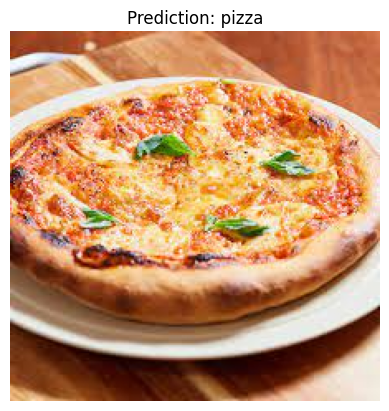

In [111]:
pred_and_plot(model_11, "pizza.jpg", class_names)

1/1 [==============================] - 0s 31ms/step


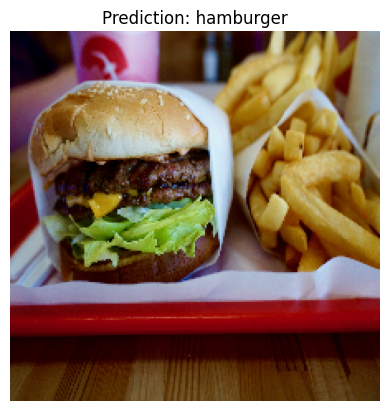

In [112]:
pred_and_plot(model_11, "hamburger.jpeg", class_names)

<div dir="rtl">

تنبؤات نموذجنا جيدة، وذلك لأنه يعمل بدقة تصل إلى 85% تقريبًا في مجموعة بيانات الاختبار.

<div dir="rtl">

## المزيد من العناصر المرئية والتفاعلية باستخدام GRADIO

In [113]:
def food_vision(image):
    if not isinstance(image, np.ndarray):
        image = tf.image.decode_image(image, channels=3)
    img = tf.image.resize(image, size=(224, 224))
    img = img / 255. # Normalize if required
    img = tf.expand_dims(img, axis=0) # Make image tensor right size for model
    #img = tf.convert_to_tensor(img, dtype=tf.float32) # Convert to tensor if needed
    pred_probs = model_11.predict(img)[0] # Get the probabilities for all classes

    # Get the class index by finding the index of the highest prediction probability
    class_index = tf.argmax(pred_probs).numpy()

    # Create a dictionary to hold the class names and their corresponding probabilities
    class_probabilities = {class_name: float(prob) for class_name, prob in zip(class_names, pred_probs)}

    # Return the class name with the highest probability along with the probabilities
    return class_names[class_index], class_probabilities

In [114]:
import gradio as gr

# Use components instead of inputs and outputs
from gradio import components as grc

# Define the interface
interface = gr.Interface(
    fn=food_vision,  # Replace with your actual function name
    inputs=grc.Image(height=400),
    outputs=[
        grc.Label(),
        grc.Label(label="Confidence", num_top_classes=10)
    ]

)

# Launch the interface
#interface.launch(share=True, debug=True)
interface.launch(share=True, debug=True)

# http://localhost:7860        ?__theme=dark

Running on local URL:  http://127.0.0.1:7861
Running on public URL: https://8ce9df4ca22a712608.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


1/1 [==============================] - 0s 27ms/step


Traceback (most recent call last):
  File "/home/halimia/miniconda3/envs/tf_pip_gpu_cloned/lib/python3.9/site-packages/gradio/queueing.py", line 501, in call_prediction
    output = await route_utils.call_process_api(
  File "/home/halimia/miniconda3/envs/tf_pip_gpu_cloned/lib/python3.9/site-packages/gradio/route_utils.py", line 253, in call_process_api
    output = await app.get_blocks().process_api(
  File "/home/halimia/miniconda3/envs/tf_pip_gpu_cloned/lib/python3.9/site-packages/gradio/blocks.py", line 1695, in process_api
    result = await self.call_function(
  File "/home/halimia/miniconda3/envs/tf_pip_gpu_cloned/lib/python3.9/site-packages/gradio/blocks.py", line 1235, in call_function
    prediction = await anyio.to_thread.run_sync(
  File "/home/halimia/miniconda3/envs/tf_pip_gpu_cloned/lib/python3.9/site-packages/anyio/to_thread.py", line 31, in run_sync
    return await get_asynclib().run_sync_in_worker_thread(
  File "/home/halimia/miniconda3/envs/tf_pip_gpu_cloned/lib/py

1/1 [==============================] - 0s 26ms/step
Keyboard interruption in main thread... closing server.
Killing tunnel 127.0.0.1:7861 <> https://8ce9df4ca22a712608.gradio.live


<div dir="rtl">

## حفظ وتحميل نموذجنا

##### بمجرد تدريب النموذج، ربما تريد أن تكون قادرًا على حفظه وتحميله في مكان آخر.

##### للقيام بذلك، يمكننا استخدام [`save`](https://www.tensorflow.org/tutorials/keras/save_and_load) و[`load_model`](https://www.tensorflow.org/tutorials/keras /save_and_load) الوظائف.

In [8]:
# Save a model
model_11.save("saved_trained_model")

INFO:tensorflow:Assets written to: saved_trained_model/assets


INFO:tensorflow:Assets written to: saved_trained_model/assets


In [34]:
import tensorflow as tf
# Load in a model and evaluate it
loaded_model_11 = tf.keras.models.load_model("saved_trained_model")
loaded_model_11.evaluate(test_data)

2023-10-21 18:23:31.978017: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-10-21 18:23:35.725236: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1616] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 78975 MB memory:  -> device: 0, name: NVIDIA A100-SXM4-80GB, pci bus id: 0000:85:00.0, compute capability: 8.0
2023-10-21 18:23:44.929567: I tensorflow/stream_executor/cuda/cuda_dnn.cc:384] Loaded cuDNN version 8801
2023-10-21 18:23:50.430089: I tensorflow/stream_executor/cuda/cuda_blas.cc:1614] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.


79/79 [==============================] - 16s 83ms/step - loss: 0.4320 - accuracy: 0.8552


[0.43203499913215637, 0.8551999926567078]

In [90]:
# Compare our unsaved model's results (same as above)
model_11.evaluate(test_data)

79/79 [==============================] - 5s 67ms/step - loss: 0.4577 - accuracy: 0.8492


[0.4576612412929535, 0.8492000102996826]

<div dir="rtl">

## 🛠 التمارين

##### 1. اقضِ 20 دقيقة في القراءة والتفاعل مع [موقع CNN الشرح](https://poloclub.github.io/cnn-explainer/).
 * ما هي المصطلحات الأساسية؟ على سبيل المثال اشرح الإلتواء بكلماتك الخاصة، والتجميع بكلماتك الخاصة

##### 2. استمتع بقسم "فهم المعلمات الفائقة" في موقع [شرح CNN](https://poloclub.github.io/cnn-explainer/) لمدة 10 دقائق.
  * ما هو حجم النواة؟
  * ما هي الخطوة؟
  * كيف يمكنك ضبط كل من هذه العناصر في كود TensorFlow؟

##### 3. التقط 10 صور لشيئين مختلفين وقم ببناء مصنف صور CNN الخاص بك باستخدام التقنيات التي أنشأناها هنا.

##### 4. ابحث عن معدل تعلم مثالي لنموذج شبكة عصبية تلافيفية بسيط في مجموعة البيانات المكونة من 10 فئات.

<div dir="rtl">

## 📖 خارج المنهج

##### 1. **شاهد:** محاضرة [مقدمة من معهد ماساتشوستس للتكنولوجيا للرؤية الحاسوبية العميقة](https://www.youtube.com/watch?v=iaSUYvmCekI&list=PLtBw6njQRU-rwp5__7C0oIVt26ZgjG9NI&index=3). سيعطيك هذا حدسًا رائعًا وراء الشبكات العصبية التلافيفية.

##### 2. **شاهد:** نظرة عميقة على [النسب التدرجي الصغير](https://youtu.be/-_4Zi8fCZO4) بواسطة Deeplearning.ai. إذا كنت لا تزال مهتمًا بمعرفة سبب استخدامنا **الدُفعات** لتدريب النماذج، فإن هذه النظرة العامة الفنية تغطي العديد من الأسباب وراء ذلك.

##### 3. **اقرأ:** ملاحظات الفصل [CS231n الشبكات العصبية التلافيفية للتعرف المرئي](https://cs231n.github.io/convolutional-networks/). سيعطي هذا فهمًا عميقًا جدًا لما يحدث خلف الكواليس في معماريات الشبكات العصبية التلافيفية التي نكتبها.

##### 4. **اقرأ:** ["دليل الحساب التلافيفي للتعلم العميق"](https://arxiv.org/pdf/1603.07285.pdf). تتناول هذه الورقة جميع الرياضيات التي تجري خلف الكواليس في طبقاتنا التلافيفية.

##### 5. **ممارسة التعليمات البرمجية:** [البرنامج التعليمي لتعزيز بيانات TensorFlow](https://www.tensorflow.org/tutorials/images/data_augmentation). للحصول على مقدمة أكثر تعمقًا حول زيادة البيانات باستخدام TensorFlow، اقضِ ساعة أو ساعتين في قراءة هذا البرنامج التعليمي.

In [115]:
!streamlit run app_food_classifier_v2.py


  You can now view your Streamlit app in your browser.

  Network URL: http://10.109.8.49:8501
  External URL: http://109.171.186.115:8501


  A new version of Streamlit is available.

  See what's new at https://discuss.streamlit.io/c/announcements

  Enter the following command to upgrade:
  $ pip install streamlit --upgrade

2024-03-17 15:01:20.188481: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-03-17 15:01:21.915188: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: :/home/halimia/miniconda3/envs/tf_pip_gpu_cloned/lib/:/home/halimia/miniconda3/envs/tf_pip_gpu_cloned/lib/python3.9/site-packages/nvidia/cudnn/lib:/home/halimia/miniconda3/envs/tf_pip_gpu/lib/:/home/halimia/miniconda3/envs/